# Job Description

 Anda bertujuan untuk melakukan segmentasi pelanggan menggunakan metode K-Means Clustering. Dengan hasil segmentasi ini, perusahaan dapat mengelompokkan pelanggan berdasarkan pola dan karakteristik tertentu, lalu memberikan rekomendasi atau perlakuan (treatment) yang sesuai untuk setiap kelompok.

# Import Library

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
pd.set_option('display.max_columns', None)

# untuk plot Q-Q
import scipy.stats as stats

# Import Data

In [2]:
df = pd.read_csv('flight.csv')

In [3]:
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,140,362480,171483.0,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,23,337314,116350.0,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,152,273844,124560.0,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


# Deskripsi Data

### Data Deskripsi

| **Code**          | **Description**                                         |
|-------------------|---------------------------------------------------------|
| MEMBER_NO-b       | ID Member                                               |
| FFP_DATE          | Frequent Flyer Program Join Date                        |
| FIRST_FLIGHT_DATE | Tanggal Penerbangan pertama                              |
| GENDER            | Jenis Kelamin                                           |
| FFP_TIER          | Tier dari Frequent Flyer Program                        |
| WORK_CITY         | Kota Asal                                               |
| WORK_PROVINCE     | Provinsi Asal                                           |
| WORK_COUNTRY      | Negara Asal                                             |
| AGE               | Umur Customer                                           |
| LOAD_TIME         | Tanggal data diambil                                    |
| FLIGHT_COUNT      | Jumlah penerbangan Customer                             |
| BP_SUM            | Rencana Perjalanan                                      |
| SUM_YR_1          | Total credit/point di tahun pertama                     |
| SUM_YR_2          | Total credit/point di tahun kedua                       |
| SEG_KM_SUM        | Total jarak(km) penerbangan yg sudah dilakukan          |
| LAST_FLIGHT_DATE  | Tanggal penerbangan terakhir                             |
| LAST_TO_END       | Jarak waktu penerbangan terakhir ke pesanan paling akhir|
| AVG_INTERVAL      | Rata-rata jarak waktu                                   |
| MAX_INTERVAL      | Maksimal jarak waktu                                    |
| EXCHANGE_COUNT    | Jumlah penukaran                                        |
| avg_discount      | Rata rata discount yang didapat customer                |
| Points_Sum        | Jumlah poin yang didapat customer                       |
| Point_NotFlight   | Point yang tidak digunakan oleh members                 |

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

### Redefinisi Kolom Tanggal/Date

Data yang perlu di redefinisikan yaitu:
1. FFP_DATE dari object menjadi dt
2. FIRST_FLIGHT_DATE dari object menjadi dt
3. LOAD_TIME dari object menjadi dt
4. LAST_FLIGHT_DATE dari object menjadi dt

In [5]:
date_columns = ["FFP_DATE", "FIRST_FLIGHT_DATE", "LAST_FLIGHT_DATE", "LOAD_TIME"]
df[date_columns] = df[date_columns].apply(pd.to_datetime, errors="coerce")

In [6]:
df[date_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           62988 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  62988 non-null  datetime64[ns]
 2   LAST_FLIGHT_DATE   62567 non-null  datetime64[ns]
 3   LOAD_TIME          62988 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.9 MB


In [7]:
df_describe = df.copy()

In [8]:
df_non_date = df_describe.drop(columns=date_columns)

In [9]:
df_non_date.describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


In [10]:
df_non_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MEMBER_NO        62988 non-null  int64  
 1   GENDER           62985 non-null  object 
 2   FFP_TIER         62988 non-null  int64  
 3   WORK_CITY        60719 non-null  object 
 4   WORK_PROVINCE    59740 non-null  object 
 5   WORK_COUNTRY     62962 non-null  object 
 6   AGE              62568 non-null  float64
 7   FLIGHT_COUNT     62988 non-null  int64  
 8   BP_SUM           62988 non-null  int64  
 9   SUM_YR_1         62437 non-null  float64
 10  SUM_YR_2         62850 non-null  float64
 11  SEG_KM_SUM       62988 non-null  int64  
 12  LAST_TO_END      62988 non-null  int64  
 13  AVG_INTERVAL     62988 non-null  float64
 14  MAX_INTERVAL     62988 non-null  int64  
 15  EXCHANGE_COUNT   62988 non-null  int64  
 16  avg_discount     62988 non-null  float64
 17  Points_Sum  

In [11]:
for column in df_non_date.columns:
    print(f"============= {column} =================")
    display(df_non_date[column].value_counts())
    print()

============= MEMBER_NO =================


MEMBER_NO
61340    1
54993    1
28065    1
55106    1
21189    1
        ..
8253     1
1254     1
57881    1
54943    1
28012    1
Name: count, Length: 62988, dtype: int64


============= GENDER =================


GENDER
Male      48134
Female    14851
Name: count, dtype: int64


============= FFP_TIER =================


FFP_TIER
4    58066
5     3409
6     1513
Name: count, dtype: int64


============= WORK_CITY =================


WORK_CITY
guangzhou          9386
beijing            7845
shanghai           5001
shenzhen           3605
dalian             1979
                   ... 
wuzhishan             1
anhuitongling         1
SANTIAGO              1
mishanshi             1
BOWLAND HEIGHTS       1
Name: count, Length: 3234, dtype: int64


============= WORK_PROVINCE =================


WORK_PROVINCE
guangdong     17509
beijing        8014
shanghai       4998
liaoning       4182
xinjiang       2512
              ...  
SAN JOSE          1
GUANGZHOU         1
Naples            1
GP                1
GUANGDONG　        1
Name: count, Length: 1165, dtype: int64


============= WORK_COUNTRY =================


WORK_COUNTRY
CN    57748
HK      991
JP      875
KR      790
US      575
      ...  
cn        1
IA        1
BG        1
CL        1
CR        1
Name: count, Length: 118, dtype: int64


============= AGE =================


AGE
47.0    2727
38.0    2713
37.0    2683
42.0    2622
39.0    2595
        ... 
7.0        1
6.0        1
87.0       1
88.0       1
91.0       1
Name: count, Length: 84, dtype: int64


============= FLIGHT_COUNT =================


FLIGHT_COUNT
2      10394
3       6477
4       5494
5       4321
6       3676
       ...  
132        1
133        1
119        1
139        1
174        1
Name: count, Length: 153, dtype: int64


============= BP_SUM =================


BP_SUM
0         565
1000      257
700       120
1526      120
2671      105
         ... 
362480      1
505308      1
503         1
204855      1
377         1
Name: count, Length: 23449, dtype: int64


============= SUM_YR_1 =================


SUM_YR_1
0.0         9915
960.0        174
690.0        151
700.0        143
1024.0       136
            ... 
120500.0       1
112364.0       1
124560.0       1
116350.0       1
163618.0       1
Name: count, Length: 15828, dtype: int64


============= SUM_YR_2 =================


SUM_YR_2
0.0         11812
883.0          76
644.0          66
986.0          62
1000.0         60
            ...  
102594.0        1
247.0           1
307.0           1
1002.0          1
1097.0          1
Name: count, Length: 16767, dtype: int64


============= SEG_KM_SUM =================


SEG_KM_SUM
3934      298
4154      181
2616      179
1298      145
1158      117
         ... 
167113      1
214590      1
305250      1
222380      1
293678      1
Name: count, Length: 29081, dtype: int64


============= LAST_TO_END =================


LAST_TO_END
1      959
2      933
4      924
3      779
5      767
      ... 
718      6
730      3
726      3
728      3
731      1
Name: count, Length: 731, dtype: int64


============= AVG_INTERVAL =================


AVG_INTERVAL
2.000000      872
3.000000      800
4.000000      622
1.000000      601
5.000000      440
             ... 
728.000000      1
565.000000      1
678.000000      1
597.000000      1
3.483254        1
Name: count, Length: 10706, dtype: int64


============= MAX_INTERVAL =================


MAX_INTERVAL
2      880
3      852
4      681
1      569
5      468
      ... 
714      1
672      1
611      1
664      1
659      1
Name: count, Length: 706, dtype: int64


============= EXCHANGE_COUNT =================


EXCHANGE_COUNT
0     54254
1      3969
2      2272
3      1066
4       591
5       309
6       186
7       106
8        71
9        38
10       36
11       18
12       14
13       11
14       11
15        9
17        5
18        4
20        4
27        3
16        3
22        2
29        1
34        1
19        1
46        1
21        1
37        1
Name: count, dtype: int64


============= avg_discount =================


avg_discount
1.000000    757
0.400000    413
0.800000    391
0.750000    370
0.700000    311
           ... 
0.307120      1
0.190000      1
0.140000      1
0.225000      1
0.283333      1
Name: count, Length: 54179, dtype: int64


============= Points_Sum =================


Points_Sum
0         423
1000      222
700        98
1526       88
400        87
         ... 
270704      1
245808      1
353101      1
337839      1
251907      1
Name: count, Length: 25062, dtype: int64


============= Point_NotFlight =================


Point_NotFlight
0      42480
1       6381
2       2838
3       1661
4       1091
       ...  
74         1
71         1
104        1
91         1
111        1
Name: count, Length: 99, dtype: int64

# Data Cleaning

## Cek Duplikasi

In [12]:
len(df_non_date.drop_duplicates()) / len(df_non_date)

1.0

In [13]:
# Menampilkan baris yang memiliki duplikat berdasarkan semua kolom
# Find duplicates
duplicates = df[date_columns][df[date_columns].duplicated(keep=False)]

print("Baris dengan duplikat:")
duplicates

Baris dengan duplikat:


,FFP_DATE,FIRST_FLIGHT_DATE,LAST_FLIGHT_DATE,LOAD_TIME
72,2011-12-21,2011-12-21,2014-03-28,2014-03-31
101,2008-09-08,2008-09-08,2014-03-27,2014-03-31
164,2006-07-23,2006-07-23,2014-03-24,2014-03-31
195,2008-09-02,2008-09-02,2014-03-29,2014-03-31
301,2005-09-09,2005-09-09,2014-03-24,2014-03-31
...,...,...,...,...
62804,2012-04-14,2012-04-14,2012-04-16,2014-03-31
62841,2013-03-15,2013-03-15,2013-03-19,2014-03-31
62943,2013-03-22,2013-03-22,2013-03-25,2014-03-31
62964,2013-01-31,2013-01-31,2013-02-10,2014-03-31


Dari 62988 Baris terdapat 1443 Baris dengan value duplikat atau setara dengan 2.29% dari total data. Sehingga bisa di drop duplikat

In [14]:
#Handling Drop duplicate
df = df.drop_duplicates()

len(df.drop_duplicates()) / len(df)

1.0

## Cek Missing Value

In [15]:
df_non_date.isna().sum()

MEMBER_NO             0
GENDER                3
FFP_TIER              0
WORK_CITY          2269
WORK_PROVINCE      3248
WORK_COUNTRY         26
AGE                 420
FLIGHT_COUNT          0
BP_SUM                0
SUM_YR_1            551
SUM_YR_2            138
SEG_KM_SUM            0
LAST_TO_END           0
AVG_INTERVAL          0
MAX_INTERVAL          0
EXCHANGE_COUNT        0
avg_discount          0
Points_Sum            0
Point_NotFlight       0
dtype: int64

In [16]:
missing_value = df[df.isna().any(axis=1)]
missing_value

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
1,28065,2007-02-19,2007-08-03,Male,6,NaN,beijing,CN,42.0,2014-03-31,140,362480,171483.0,167434.0,293678,2014-03-25,7,5.194245,17,29,1.252314,415768,33
8,32197,2011-06-07,2011-07-01,Male,5,DRANCY,NaN,FR,50.0,2014-03-31,56,262958,72596.0,87401.0,321489,2014-03-26,6,13.054545,94,5,0.828478,295158,7
17,58899,2010-11-10,2011-02-23,Female,6,PARIS,NaN,FR,50.0,2014-03-31,40,249882,66239.0,63260.0,284160,2014-02-16,45,17.589744,77,12,0.837844,281705,13
21,41281,2011-06-07,2011-06-09,Male,6,VECHEL,NORD BRABANT,AN,NaN,2014-03-31,23,255573,46800.0,198224.0,214590,2014-03-26,6,32.909091,135,7,1.061631,286520,9
23,28474,2010-04-13,2010-04-13,Male,6,NaN,CA,US,41.0,2014-03-31,20,256337,64258.0,59600.0,222380,2014-01-18,74,32.789474,110,8,1.004904,280760,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62974,11163,2005-05-08,2005-08-26,Male,4,NaN,NaN,CN,34.0,2014-03-31,2,400,0.0,960.0,368,2014-01-03,89,70.000000,70,0,0.710000,900,1
62975,30765,2008-11-16,2013-11-30,Male,4,TAIPEI,NaN,TW,38.0,2014-03-31,2,400,0.0,910.0,368,2013-12-02,121,2.000000,2,0,0.670000,400,0
62977,16372,2012-12-20,2012-12-20,Male,4,taoyuan,NaN,TW,47.0,2014-03-31,2,0,330.0,0.0,904,2012-12-24,464,4.000000,4,0,0.250000,0,0
62979,34330,2013-03-16,2013-03-17,Male,4,wulumuqi,xinjiang,CN,41.0,2014-03-31,2,0,NaN,0.0,746,2013-03-19,379,2.000000,2,0,0.250000,0,0


In [17]:
num_missing_rows = len(missing_value)
print(f"Jumlah baris dengan missing value: {num_missing_rows}")

Jumlah baris dengan missing value: 5128


Ternyata terdapat Missing Value di 23 Kolom tersebut.

Lalu kita akan cek berapa masing-masing kolom memiliki persentase missing value, dalam statistik ketentuannya ialah jika diatas 20% maka kita drop kolomnya, jika <= 20% maka di handling karena alasan distribusi data.

### Aturan missing value handling :
1. jika tipe datanya itu **numerik** -> handling menggunakan **median** (robust / tahan terhadap outlier)
2. jika tipe datanya itu **kategorik / object / string** -> handling menggunakan **mode / modus**

#### Missing Value FFP_DATE

In [18]:
# Menghitung persentase nilai NaT di kolom FFP_DATE
100 * len(df[(df['FFP_DATE'].isna())]) / len(df)

0.0

In [19]:
# Menghitung median FFP_DATE
median_rating = df[df['FFP_DATE'].notna()]['FFP_DATE'].median()
median_rating

Timestamp('2010-10-08 00:00:00')

In [20]:
df['FFP_DATE'] = df['FFP_DATE'].apply(lambda x: median_rating if pd.isna(x) else x)
100 * len(df[(df['FFP_DATE'].isna())]) / len(df)

0.0

#### Missing Value FIRST_FLIGHT_DATE

In [21]:
# Menghitung persentase nilai NaT di kolom FIRST_FLIGHT_DATE
100 * len(df[(df['FIRST_FLIGHT_DATE'].isna())]) / len(df)

0.0

In [22]:
median_rating = df[df['FIRST_FLIGHT_DATE'].notna()]['FIRST_FLIGHT_DATE'].median()
median_rating

Timestamp('2011-04-23 00:00:00')

In [23]:
df['FIRST_FLIGHT_DATE'] = df['FIRST_FLIGHT_DATE'].apply(lambda x: median_rating if pd.isna(x) else x)
100 * len(df[(df['FIRST_FLIGHT_DATE'].isna())]) / len(df)

0.0

#### Missing Value LAST_FLIGHT_DATE

In [24]:
# Menghitung persentase nilai NaT di kolom LAST_FLIGHT_DATE
100 * len(df[(df['LAST_FLIGHT_DATE'].isna())]) / len(df)

0.6683812789737728

In [25]:
median_rating = df[df['LAST_FLIGHT_DATE'].notna()]['LAST_FLIGHT_DATE'].median()
median_rating

Timestamp('2013-12-14 00:00:00')

In [26]:
df['LAST_FLIGHT_DATE'] = df['LAST_FLIGHT_DATE'].apply(lambda x: median_rating if pd.isna(x) else x)
100 * len(df[(df['LAST_FLIGHT_DATE'].isna())]) / len(df)

0.0

#### Missing Value LOAD_TIME

In [27]:
# Menghitung persentase nilai NaT di kolom LOAD_TIME
100 * len(df[(df['LOAD_TIME'].isna())]) / len(df)

0.0

In [28]:
# Menghitung median LOAD_TIME
median_rating = df[df['LOAD_TIME'].notna()]['LOAD_TIME'].median()
median_rating

Timestamp('2014-03-31 00:00:00')

In [29]:
df['LOAD_TIME'] = df['LOAD_TIME'].apply(lambda x: median_rating if pd.isna(x) else x)
100 * len(df[(df['LOAD_TIME'].isna())]) / len(df)

0.0

#### Missing Value GENDER

In [30]:
100 * len(df[(df['GENDER'].isna())]) / len(df)

0.004762811964183654

In [31]:
# Mode imputation for GENDER
mode_size = df[~df['GENDER'].isna()]['GENDER'].mode()[0]
mode_size

'Male'

In [32]:
df['GENDER'] = df['GENDER'].apply(lambda x: mode_size if pd.isna(x) else x)
100 * len(df[(df['GENDER'].isna())]) / len(df)

0.0

#### Missing Value WORK_CITY

In [33]:
100 * len(df[(df['WORK_CITY'].isna())]) / len(df)

3.602273448910904

In [34]:
mode_size = df[~df['WORK_CITY'].isna()]['WORK_CITY'].mode()[0]
mode_size

'guangzhou'

In [35]:
df['WORK_CITY'] = df['WORK_CITY'].apply(lambda x: mode_size if pd.isna(x) else x)
100 * len(df[(df['WORK_CITY'].isna())]) / len(df)

0.0

#### Cek Missing Value WORK_PROVINCE

In [36]:
100 * len(df[(df['WORK_PROVINCE'].isna())]) / len(df)

5.156537753222836

In [37]:
mode_size = df[~df['WORK_PROVINCE'].isna()]['WORK_PROVINCE'].mode()[0]
mode_size

'guangdong'

In [38]:
df['WORK_PROVINCE'] = df['WORK_PROVINCE'].apply(lambda x: mode_size if pd.isna(x) else x)
100 * len(df[(df['WORK_PROVINCE'].isna())]) / len(df)

0.0

#### Cek Missing Value WORK_COUNTRY 

In [39]:
100 * len(df[(df['WORK_COUNTRY'].isna())]) / len(df)

0.04127770368959167

In [40]:
mode_size = df[~df['WORK_COUNTRY'].isna()]['WORK_COUNTRY'].mode()[0]
mode_size

'CN'

In [41]:
df['WORK_COUNTRY'] = df['WORK_COUNTRY'].apply(lambda x: mode_size if pd.isna(x) else x)
100 * len(df[(df['WORK_COUNTRY'].isna())]) / len(df)

0.0

#### Cek Missing Value AGE

In [42]:
100 * len(df[(df['AGE'].isna())]) / len(df)

0.6667936749857115

In [43]:
mode_size = df[~df['AGE'].isna()]['AGE'].mode()[0]
mode_size

np.float64(47.0)

In [44]:
df['AGE'] = df['AGE'].apply(lambda x: mode_size if pd.isna(x) else x)
100 * len(df[(df['AGE'].isna())]) / len(df)

0.0

#### Cek Missing Value SUM_YR_1

In [45]:
100 * len(df[(df['SUM_YR_1'].isna())]) / len(df)

0.8747697974217311

In [46]:
mode_size = df[~df['SUM_YR_1'].isna()]['SUM_YR_1'].mode()[0]
mode_size

np.float64(0.0)

In [47]:
df['SUM_YR_1'] = df['SUM_YR_1'].apply(lambda x: mode_size if pd.isna(x) else x)
100 * len(df[(df['SUM_YR_1'].isna())]) / len(df)

0.0

#### Cek Missing Value SUM_YR_2

In [48]:
100 * len(df[(df['SUM_YR_2'].isna())]) / len(df)

0.2190893503524481

In [49]:
mode_size = df[~df['SUM_YR_2'].isna()]['SUM_YR_2'].mode()[0]
mode_size

np.float64(0.0)

In [50]:
df['SUM_YR_2'] = df['SUM_YR_2'].apply(lambda x: mode_size if pd.isna(x) else x)
100 * len(df[(df['SUM_YR_2'].isna())]) / len(df)

0.0

## Setelah Missing Value Handling

In [51]:
after_missing_value = df[df.isna().any(axis=1)]
after_missing_value

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight


In [52]:
num_missing_rows = len(after_missing_value)
print(f"Jumlah baris dengan missing value: {num_missing_rows}")

Jumlah baris dengan missing value: 0


## Cek Outlier

In [53]:
# Memilih semua kolom numerik dalam DataFrame
numeric_columns = df.select_dtypes(include=['number'])

# Menampilkan kolom-kolom numerik
print("Kolom numerik:")
print(numeric_columns.columns)

Kolom numerik:
Index(['MEMBER_NO', 'FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1',
       'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL',
       'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight'],
      dtype='object')


In [54]:
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31.0,2014-03-31,210,505308,239560.0,234188.0,580717,2014-03-31,1,3.483254,18,34,0.961639,619760,50
1,28065,2007-02-19,2007-08-03,Male,6,guangzhou,beijing,CN,42.0,2014-03-31,140,362480,171483.0,167434.0,293678,2014-03-25,7,5.194245,17,29,1.252314,415768,33
2,55106,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40.0,2014-03-31,135,351159,163618.0,164982.0,283712,2014-03-21,11,5.298507,18,20,1.254676,406361,26
3,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64.0,2014-03-31,23,337314,116350.0,125500.0,281336,2013-12-26,97,27.863636,73,11,1.090870,372204,12
4,39546,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48.0,2014-03-31,152,273844,124560.0,130702.0,309928,2014-03-27,5,4.788079,47,27,0.970658,338813,39


In [55]:
def check_plot(df, variable):
    # fungsi mengambil kerangka data (df) dan
    # variabel yang diminati sebagai argumen

    # tentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

#### Outlier Handling AGE

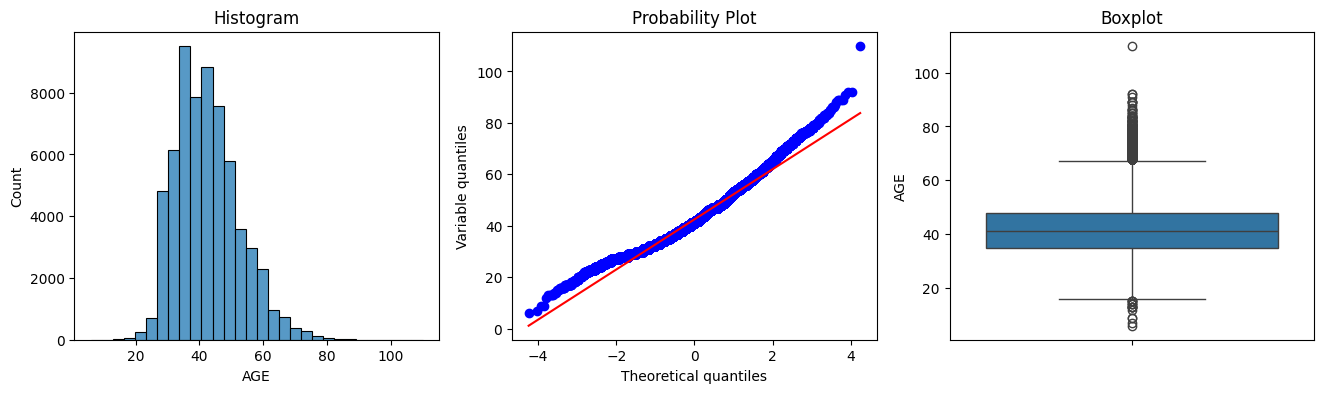

In [56]:
check_plot(df, 'AGE') 

In [57]:
def find_outlier_boundary(df, variable):

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

occup_upper_limit, occup_lower_limit = find_outlier_boundary(df, 'AGE')
occup_upper_limit, occup_lower_limit

(np.float64(67.5), np.float64(15.5))

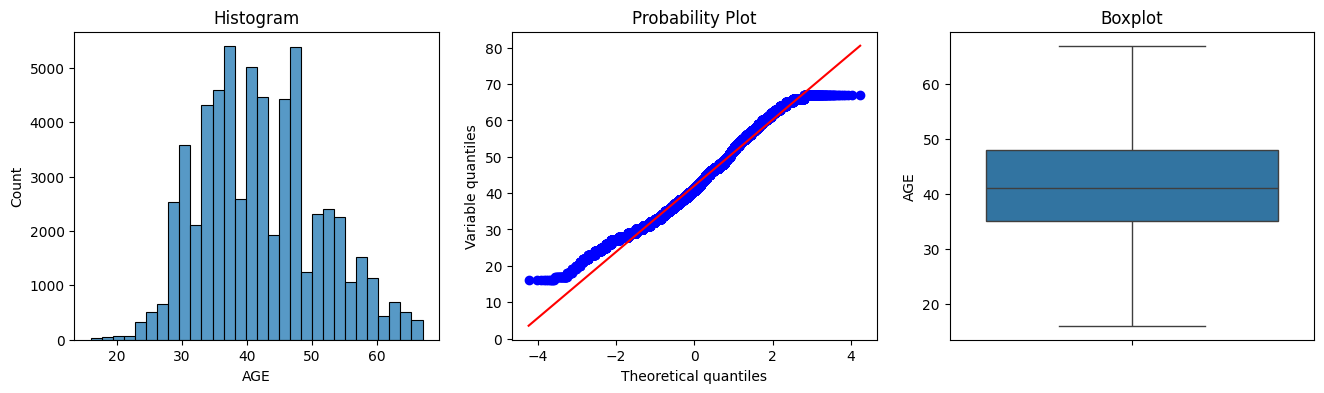

In [58]:
df = df[(df['AGE'] <= occup_upper_limit) & (df['AGE'] >= occup_lower_limit)]
check_plot(df, 'AGE') 

#### Outlier Handling BP_SUM

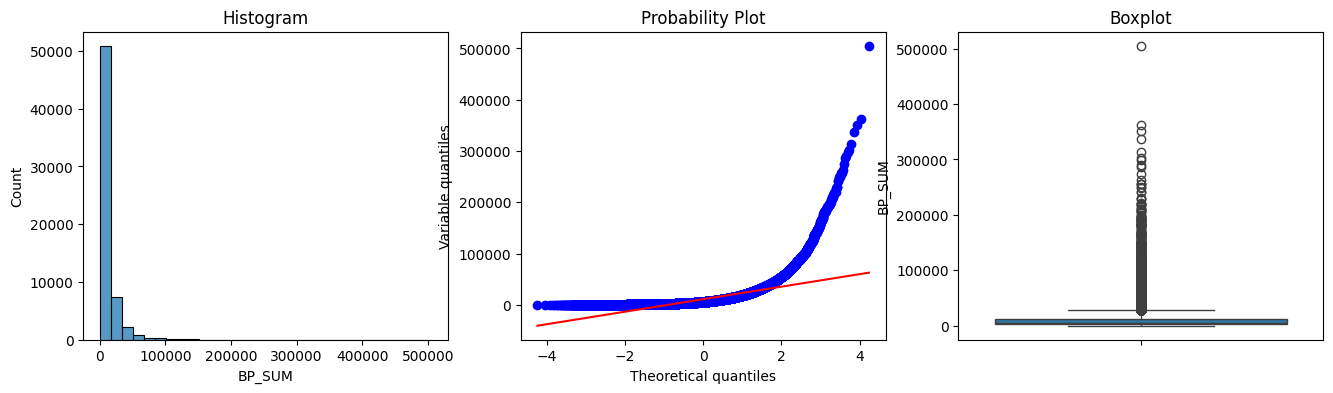

In [59]:
check_plot(df, 'BP_SUM') 

In [60]:
occup_upper_limit, occup_lower_limit = find_outlier_boundary(df, 'BP_SUM')
occup_upper_limit, occup_lower_limit

(np.float64(28275.875), np.float64(-12935.125))

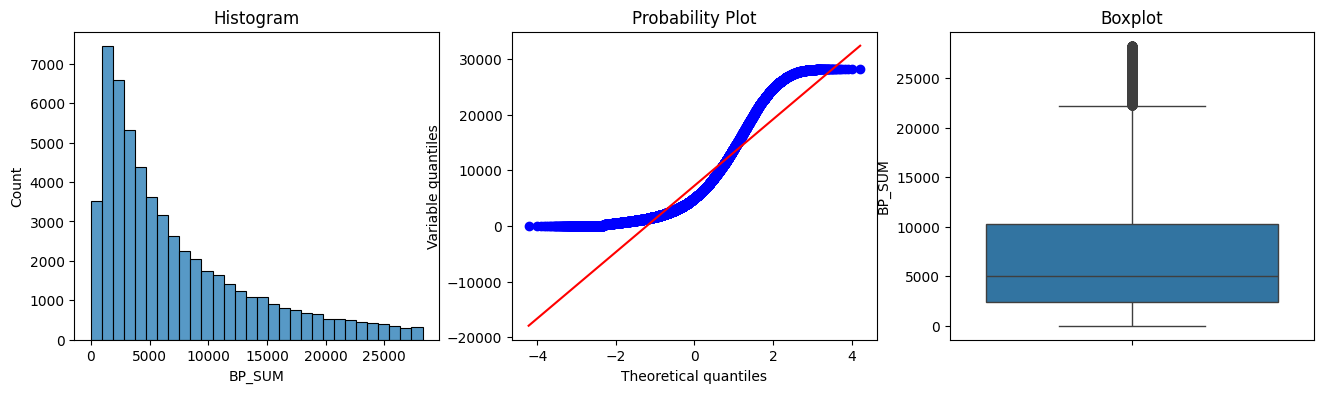

In [61]:
df = df[(df['BP_SUM'] <= occup_upper_limit) & (df['BP_SUM'] >= occup_lower_limit)]
check_plot(df, 'BP_SUM') 

#### Outlier Handling FLIGHT_COUNT

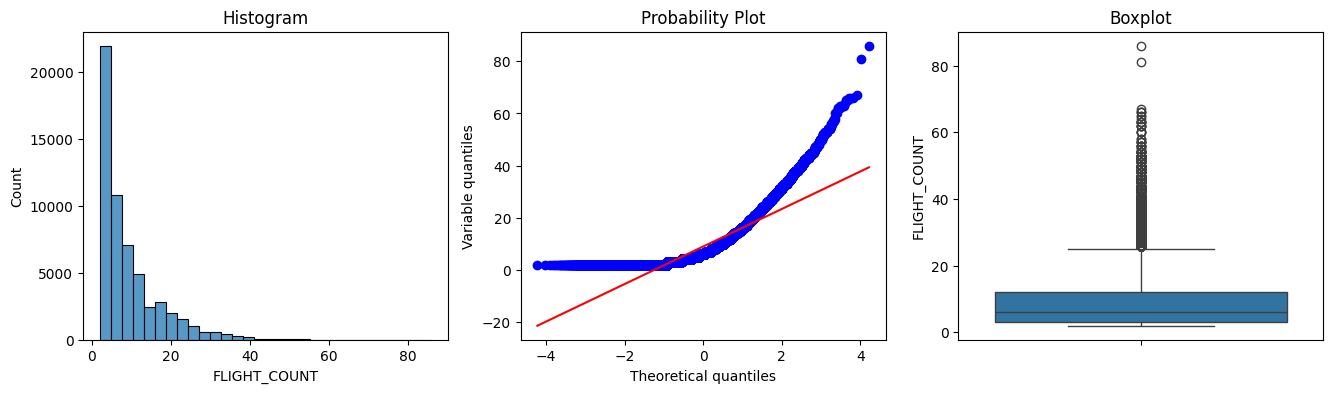

In [62]:
check_plot(df, 'FLIGHT_COUNT') 

In [63]:
occup_upper_limit, occup_lower_limit = find_outlier_boundary(df, 'FLIGHT_COUNT')
occup_upper_limit, occup_lower_limit

(np.float64(25.5), np.float64(-10.5))

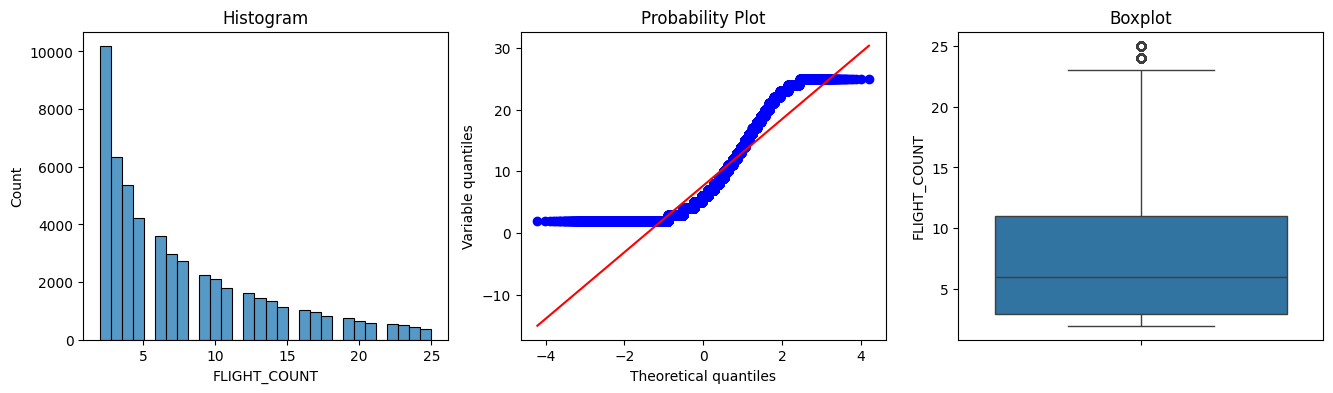

In [64]:
df = df[(df['FLIGHT_COUNT'] <= occup_upper_limit) & (df['FLIGHT_COUNT'] >= occup_lower_limit)]
check_plot(df, 'FLIGHT_COUNT') 

#### Outlier Handling SEG_KM_SUM

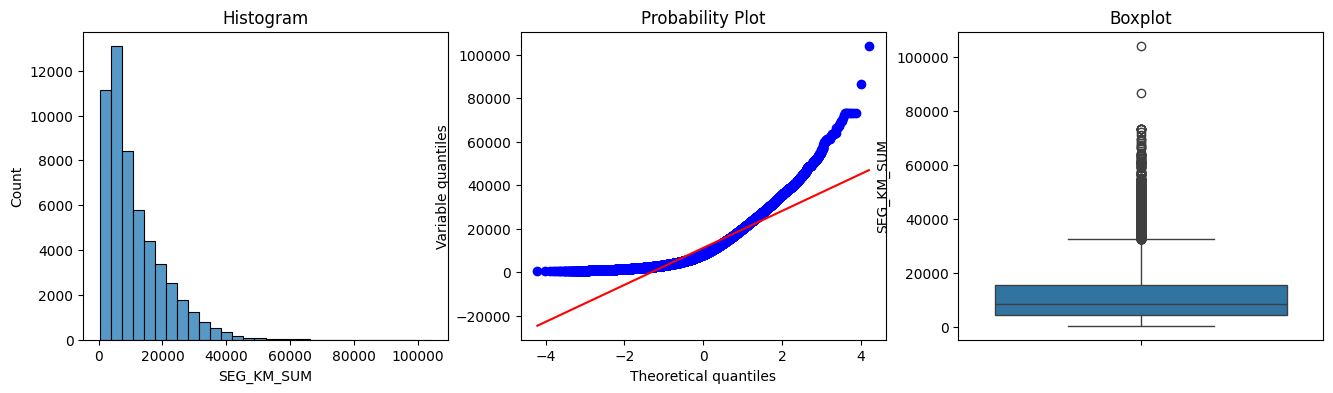

In [65]:
check_plot(df, 'SEG_KM_SUM') 

In [66]:
occup_upper_limit, occup_lower_limit = find_outlier_boundary(df, 'SEG_KM_SUM')
occup_upper_limit, occup_lower_limit

(np.float64(32582.0), np.float64(-12794.0))

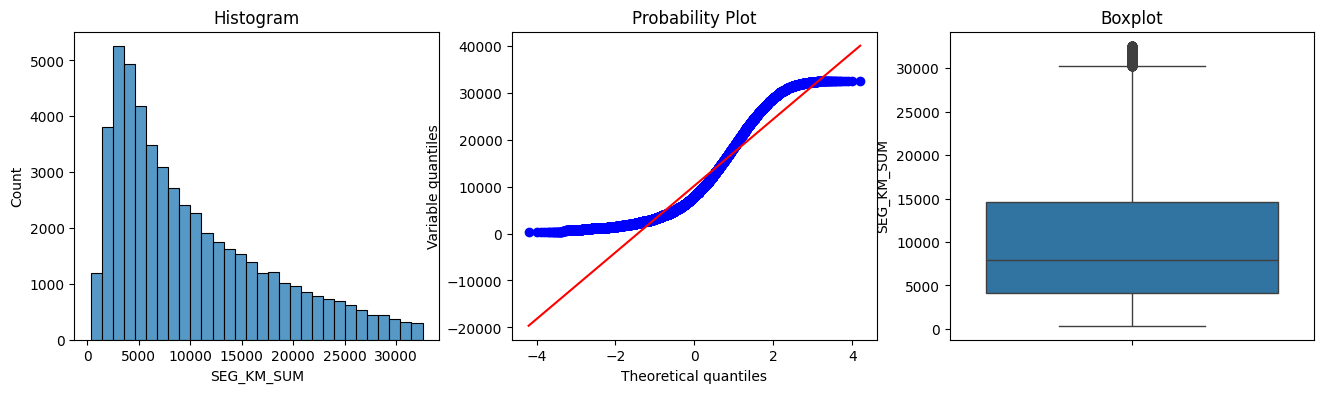

In [67]:
df = df[(df['SEG_KM_SUM'] <= occup_upper_limit) & (df['SEG_KM_SUM'] >= occup_lower_limit)]
check_plot(df, 'SEG_KM_SUM') 

#### Outlier Handling LAST_TO_END

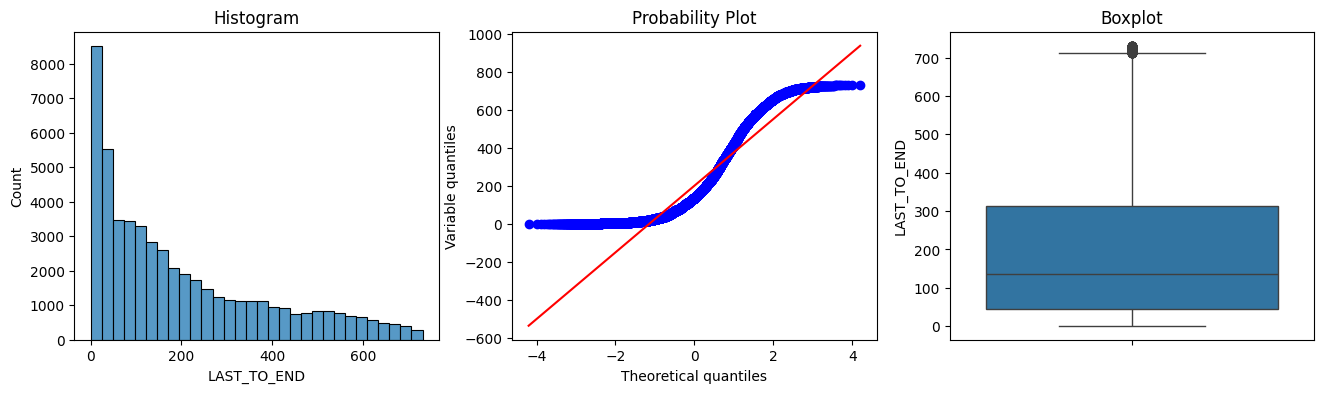

In [68]:
check_plot(df, 'LAST_TO_END') 

In [69]:
occup_upper_limit, occup_lower_limit = find_outlier_boundary(df, 'LAST_TO_END')
occup_upper_limit, occup_lower_limit

(np.float64(712.5), np.float64(-355.5))

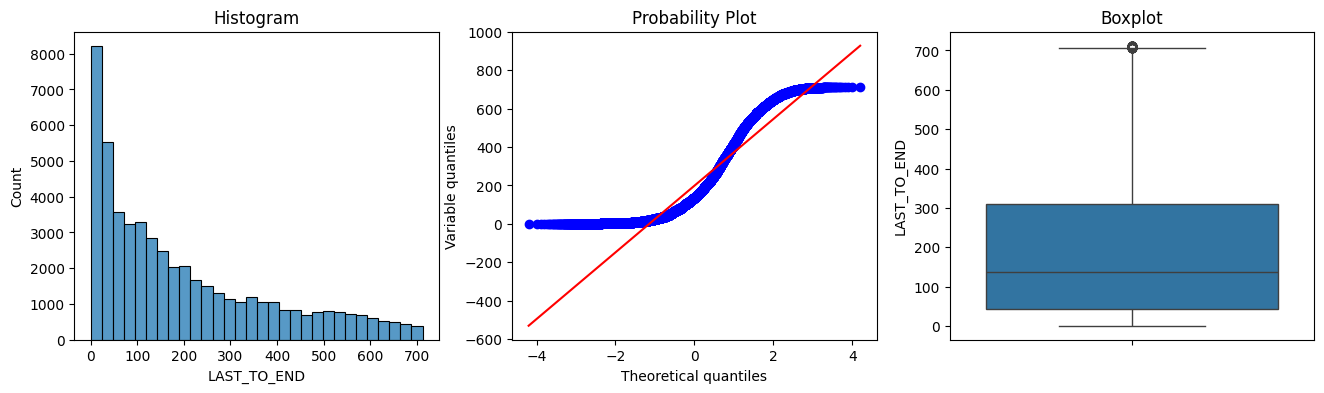

In [70]:
df = df[(df['LAST_TO_END'] <= occup_upper_limit) & (df['LAST_TO_END'] >= occup_lower_limit)]
check_plot(df, 'LAST_TO_END') 

#### Outlier Handling AVG_INTERVAL

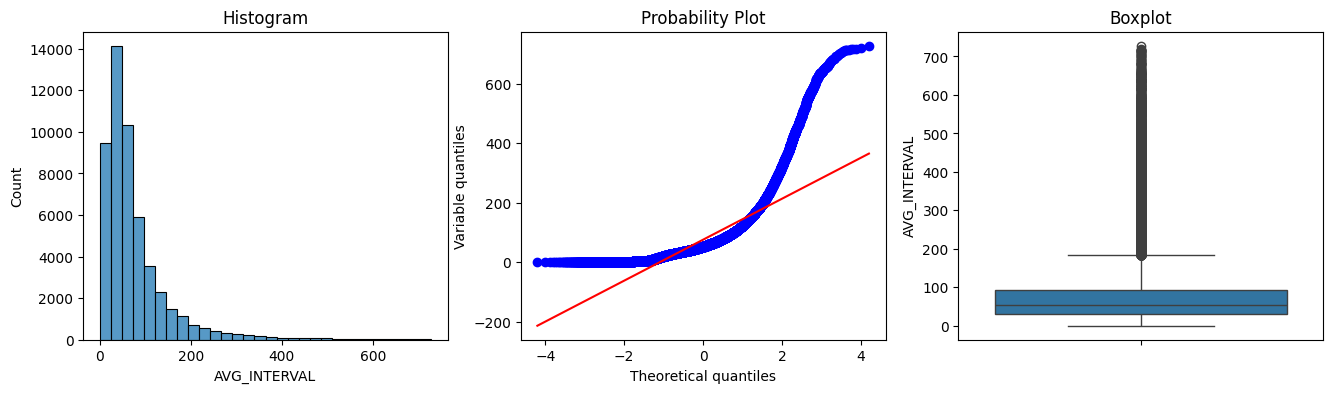

In [71]:
check_plot(df, 'AVG_INTERVAL') 

In [72]:
occup_upper_limit, occup_lower_limit = find_outlier_boundary(df, 'AVG_INTERVAL')
occup_upper_limit, occup_lower_limit

(np.float64(183.5), np.float64(-60.5))

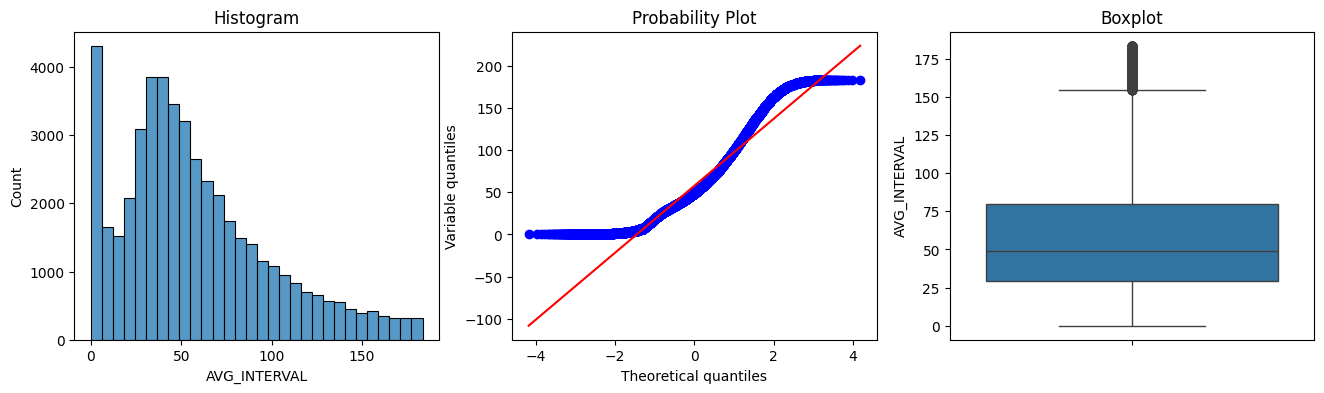

In [73]:
df = df[(df['AVG_INTERVAL'] <= occup_upper_limit) & (df['AVG_INTERVAL'] >= occup_lower_limit)]
check_plot(df, 'AVG_INTERVAL') 

#### Outlier Handling MAX_INTERVAL

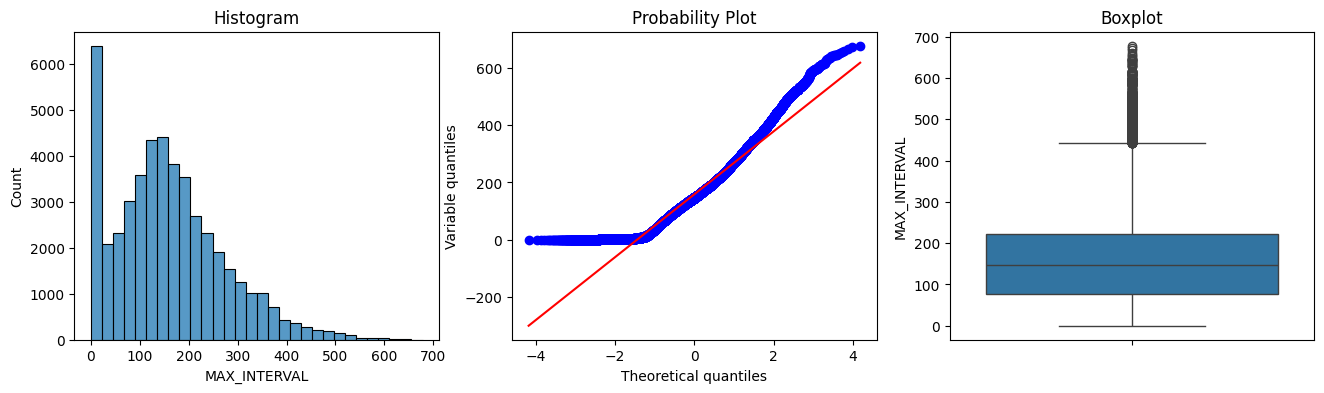

In [74]:
check_plot(df, 'MAX_INTERVAL') 

In [75]:
occup_upper_limit, occup_lower_limit = find_outlier_boundary(df, 'MAX_INTERVAL')
occup_upper_limit, occup_lower_limit

(np.float64(442.0), np.float64(-142.0))

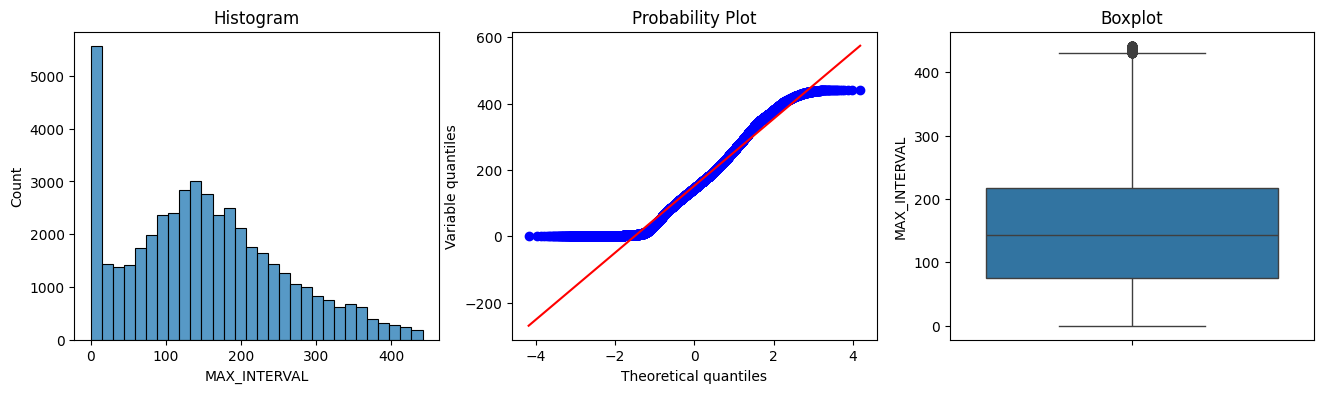

In [76]:
df = df[(df['MAX_INTERVAL'] <= occup_upper_limit) & (df['MAX_INTERVAL'] >= occup_lower_limit)]
check_plot(df, 'MAX_INTERVAL') 

#### Outlier Handling EXCHANGE_COUNT

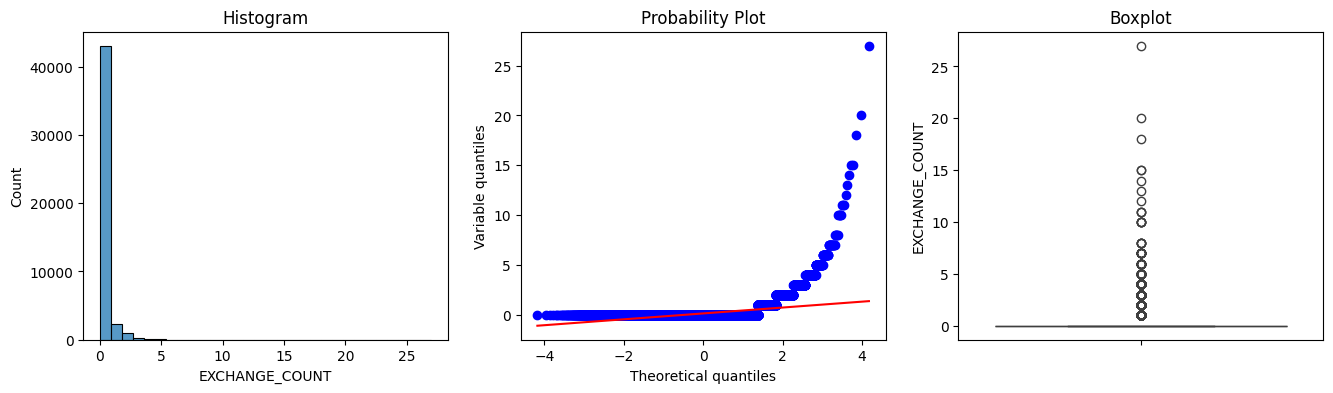

In [77]:
check_plot(df, 'EXCHANGE_COUNT') 

In [78]:
occup_upper_limit, occup_lower_limit = find_outlier_boundary(df, 'EXCHANGE_COUNT')
occup_upper_limit, occup_lower_limit

(np.float64(0.0), np.float64(0.0))

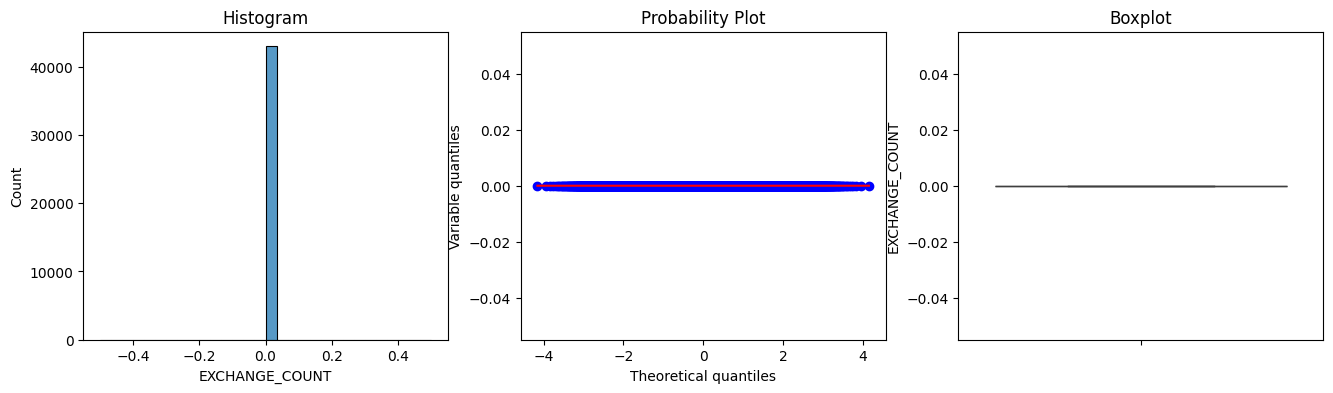

In [79]:
df = df[(df['EXCHANGE_COUNT'] <= occup_upper_limit) & (df['EXCHANGE_COUNT'] >= occup_lower_limit)]
check_plot(df, 'EXCHANGE_COUNT') 

#### Outlier Handling avg_discount

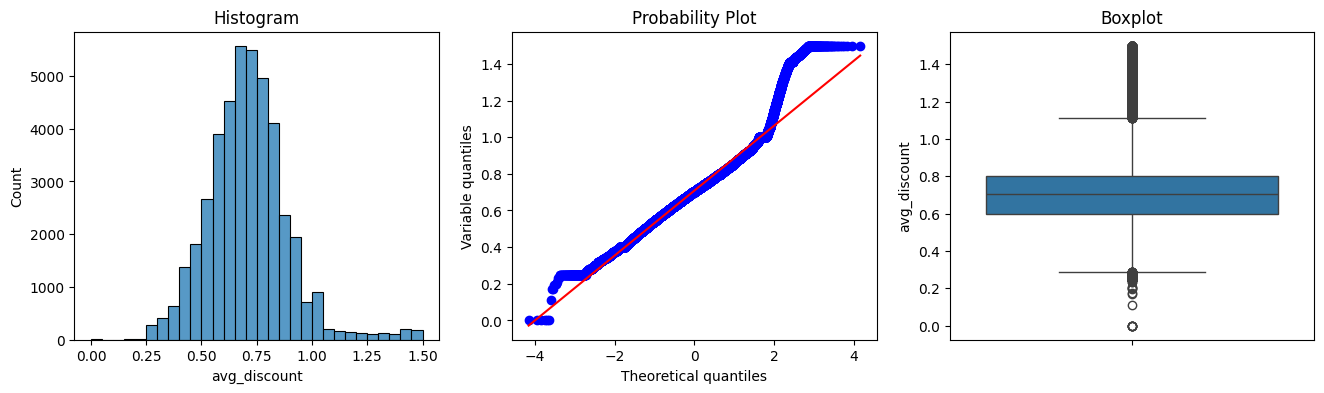

In [80]:
check_plot(df, 'avg_discount') 

In [81]:
occup_upper_limit, occup_lower_limit = find_outlier_boundary(df, 'avg_discount')
occup_upper_limit, occup_lower_limit

(np.float64(1.11214552975), np.float64(0.28845979775))

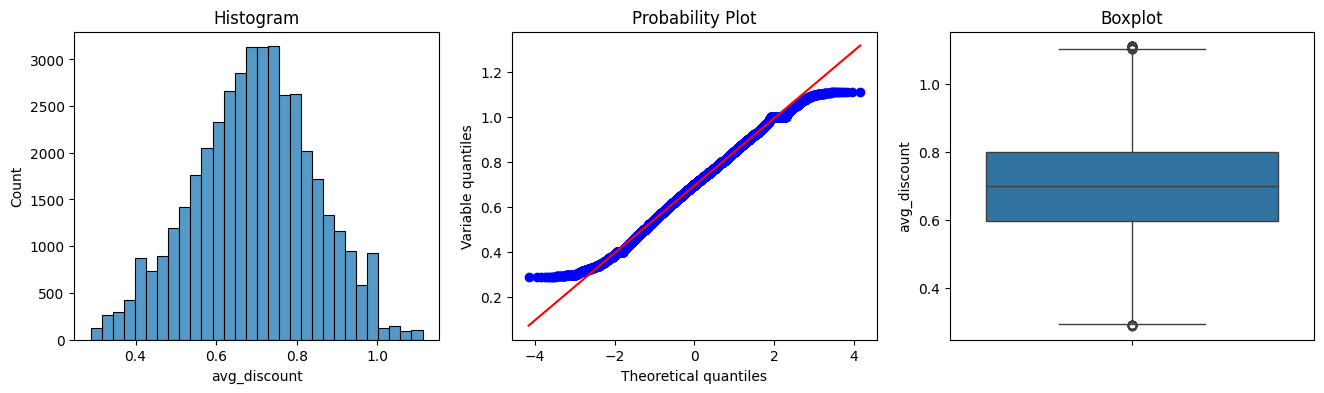

In [82]:
df = df[(df['avg_discount'] <= occup_upper_limit) & (df['avg_discount'] >= occup_lower_limit)]
check_plot(df, 'avg_discount') 

#### Outlier Handling Points_Sum

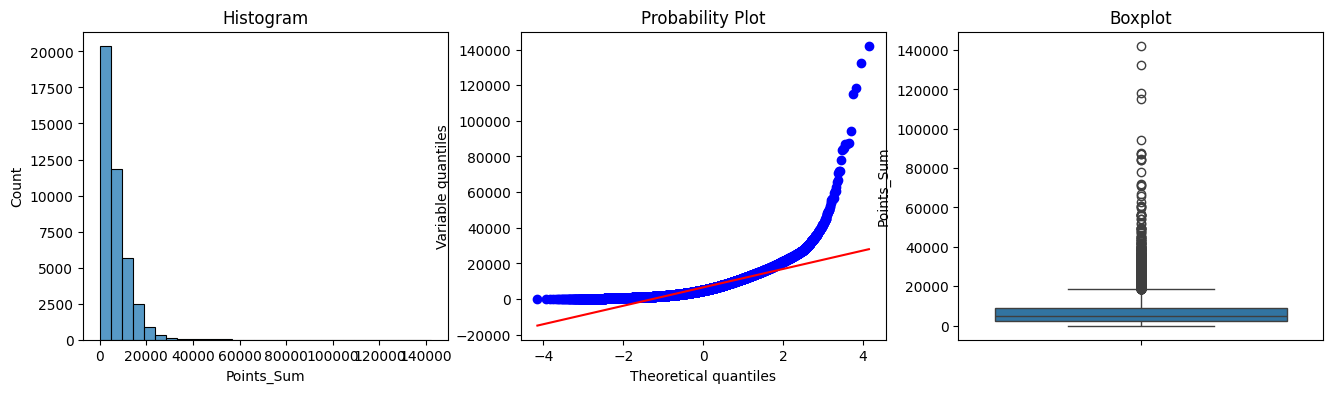

In [83]:
check_plot(df, 'Points_Sum') 

In [84]:
occup_upper_limit, occup_lower_limit = find_outlier_boundary(df, 'Points_Sum')
occup_upper_limit, occup_lower_limit

(np.float64(18733.5), np.float64(-7326.5))

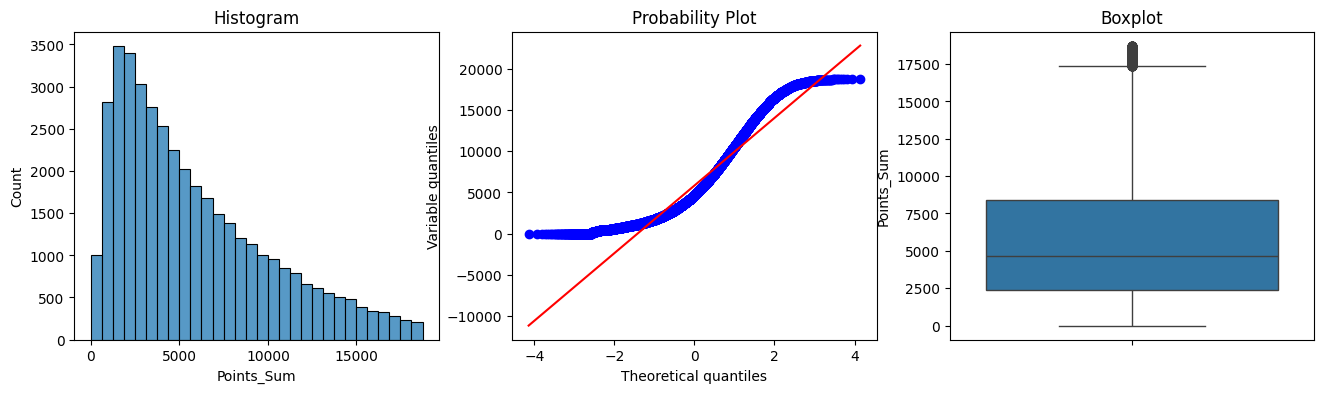

In [85]:
df = df[(df['Points_Sum'] <= occup_upper_limit) & (df['Points_Sum'] >= occup_lower_limit)]
check_plot(df, 'Points_Sum') 

#### Outlier Handling Point_NotFlight

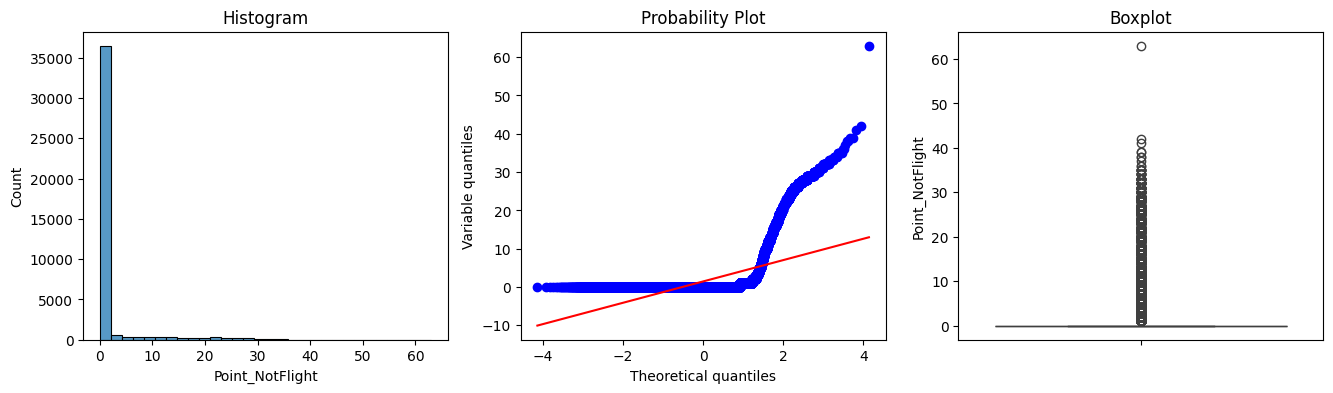

In [86]:
check_plot(df, 'Point_NotFlight') 

In [87]:
occup_upper_limit, occup_lower_limit = find_outlier_boundary(df, 'Point_NotFlight')
occup_upper_limit, occup_lower_limit

(np.float64(0.0), np.float64(0.0))

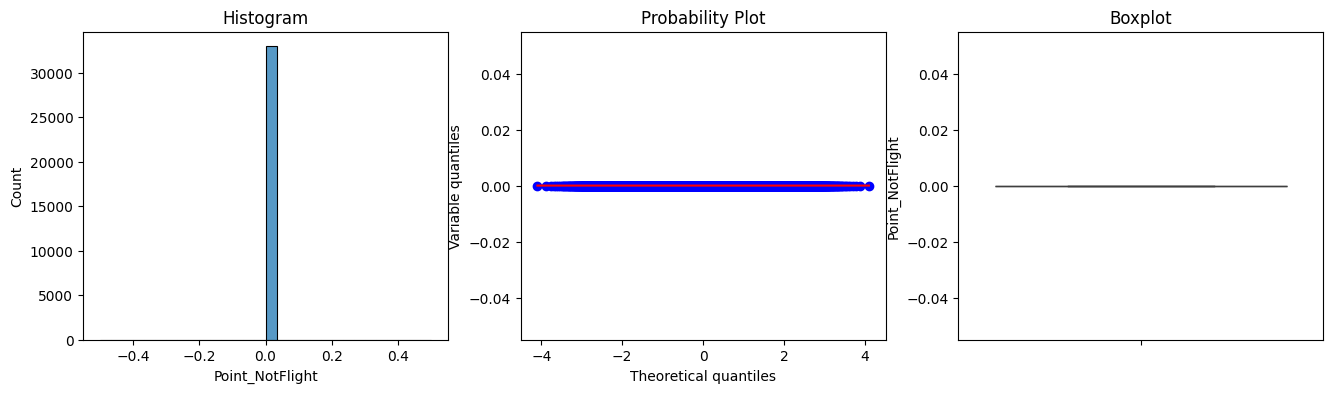

In [88]:
df = df[(df['Point_NotFlight'] <= occup_upper_limit) & (df['Point_NotFlight'] >= occup_lower_limit)]
check_plot(df, 'Point_NotFlight') 

#### Outlier Handling FFP_TIER

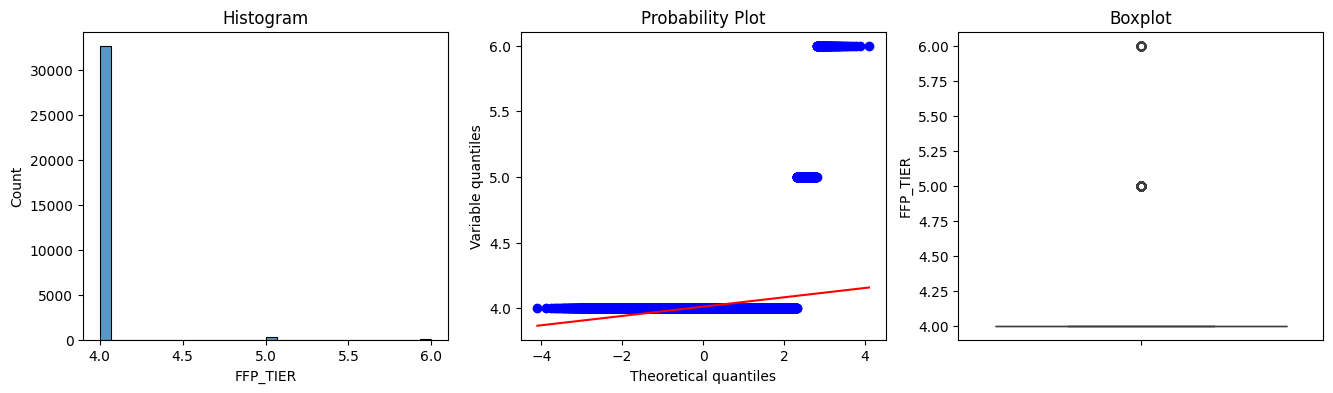

In [89]:
check_plot(df, 'FFP_TIER') 

In [90]:
occup_upper_limit, occup_lower_limit = find_outlier_boundary(df, 'FFP_TIER')
occup_upper_limit, occup_lower_limit

(np.float64(4.0), np.float64(4.0))

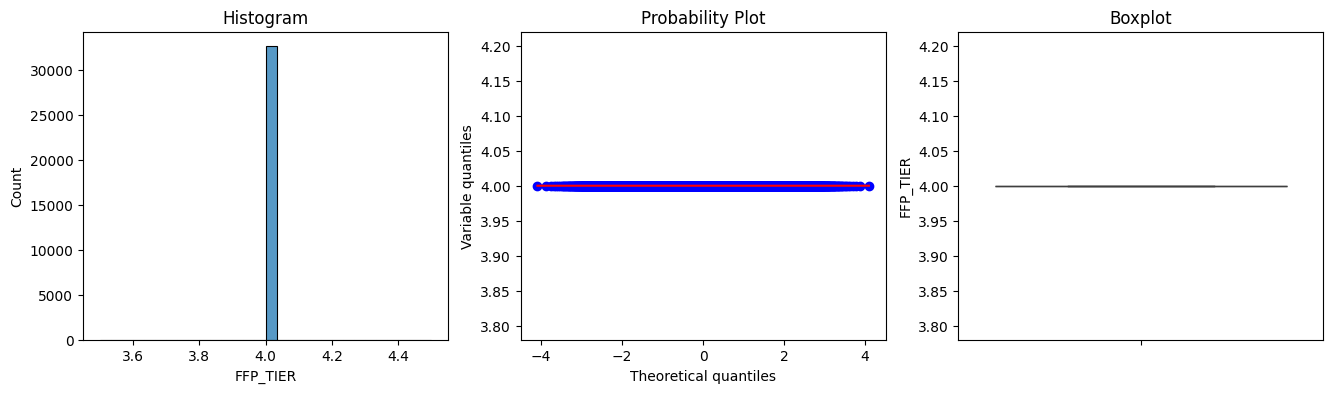

In [91]:
df = df[(df['FFP_TIER'] <= occup_upper_limit) & (df['FFP_TIER'] >= occup_lower_limit)]
check_plot(df, 'FFP_TIER') 

# RFM Feature Selection

In [92]:
df[date_columns].max()

FFP_DATE            2013-03-31
FIRST_FLIGHT_DATE   2015-05-30
LAST_FLIGHT_DATE    2014-03-31
LOAD_TIME           2014-03-31
dtype: datetime64[ns]

In [93]:
# Tentukan max_date (hari ini)
max_first_flight_date = pd.to_datetime('2015-05-30')

In [94]:
# 1. Recency (max_date + 2 hari - LAST_FLIGHT_DATE)
df['Recency'] = (max_first_flight_date + pd.Timedelta(days=2) - df['LAST_FLIGHT_DATE']).dt.days

In [95]:
# 2. Frequency: Jumlah penerbangan
df['Frequency'] = df['FLIGHT_COUNT']

In [96]:
# 3. Monetary: Total jarak tempuh penerbangan
df['Monetary'] = df['SEG_KM_SUM']

In [97]:
# 4. Length: Lama berlangganan sejak FFP_DATE
df['Length'] = (max_first_flight_date - df['FFP_DATE']).dt.days

In [98]:
# 5. Coefficient (C):  Frequency / Length
df['Coefficient'] = df['Frequency'] / df['Length']

In [99]:
# Menampilkan hasil akhir
rfmlc = df[['MEMBER_NO', 'Recency', 'Frequency', 'Monetary', 'Length', 'Coefficient']]
print(rfmlc)

       MEMBER_NO  Recency  Frequency  Monetary  Length  Coefficient
8307       50197      466         19     29113    1071     0.017740
8520       24807      642          4     32508    1010     0.003960
8521        7690      584         21     32130    1961     0.010709
8567       24662      492         21     31721    1074     0.019553
8591       50463      427         15     30662    1050     0.014286
...          ...      ...        ...       ...     ...          ...
62963      10999      677          2       368    3817     0.000524
62964      34341      841          2       368     849     0.002356
62965      57428      843          2       368    2367     0.000845
62966      60676      837          2       368    1052     0.001901
62975      30765      546          2       368    2386     0.000838

[32626 rows x 6 columns]


## Standardisasi dan Splitting Data

In [100]:
X = df[['Recency', 'Frequency', 'Monetary', 'Length', 'Coefficient']]

In [101]:
# Step 2: Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [102]:
# Step 3: Split data menjadi Train dan Test
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

## Silhouette dan Elbow Methode

In [103]:
# Step 4: Tentukan jumlah cluster menggunakan Elbow Method dan Silhouette Score
wcss = []
silhouette_scores = []
K_range = range(2, 11)

In [104]:
for i in K_range:
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_train)
    # Simpan nilai inertia (WCSS)
    wcss.append(kmeans.inertia_)
    # Hitung silhouette score
    cluster_labels = kmeans.predict(X_train)
    silhouette_avg = silhouette_score(X_train, cluster_labels)
    silhouette_scores.append(silhouette_avg)

In [105]:
# Menentukan jumlah cluster terbaik berdasarkan Elbow Method
optimal_k_elbow = K_range[np.argmin(np.diff(np.diff(wcss))) + 2]

# Menentukan jumlah cluster terbaik berdasarkan Silhouette Score
optimal_k_silhouette = K_range[np.argmax(silhouette_scores)]

print(f"Jumlah cluster optimal berdasarkan Elbow Method: {optimal_k_elbow}")
print(f"Jumlah cluster optimal berdasarkan Silhouette Score: {optimal_k_silhouette}")

Jumlah cluster optimal berdasarkan Elbow Method: 10
Jumlah cluster optimal berdasarkan Silhouette Score: 2


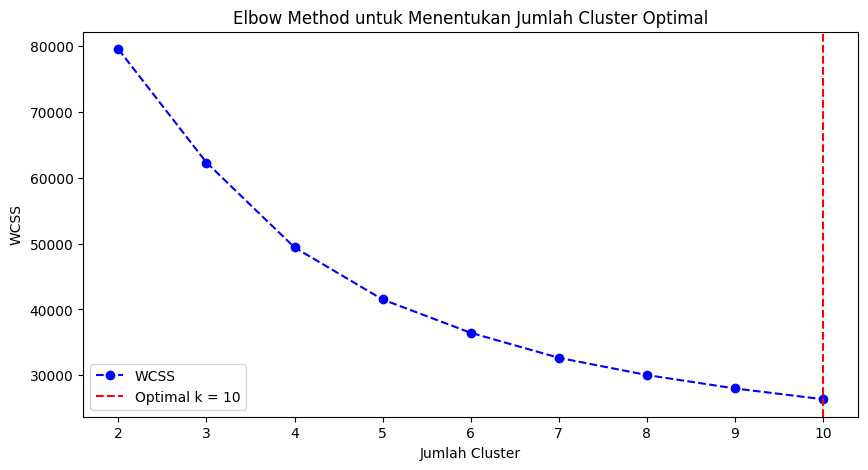

In [106]:
# Visualisasi hasil Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(list(K_range), wcss, marker='o', linestyle='--', color='b', label='WCSS')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.axvline(x=optimal_k_elbow, linestyle='--', color='r', label=f'Optimal k = {optimal_k_elbow}')
plt.legend()
plt.show()

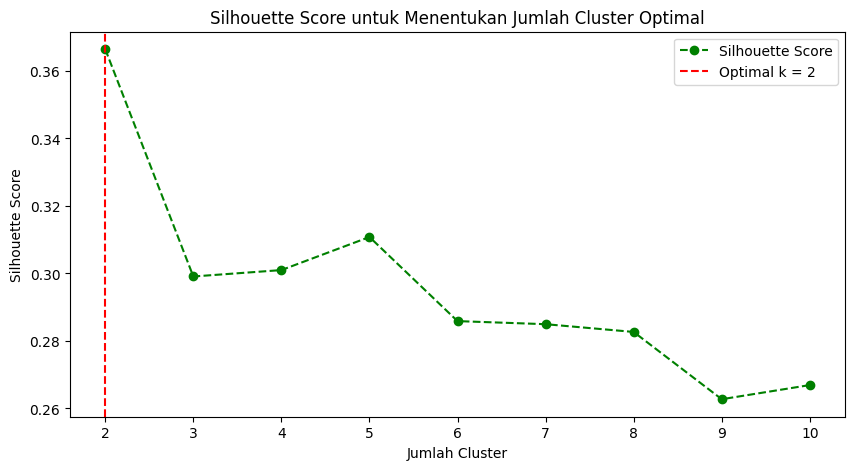

In [107]:
# Visualisasi hasil Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(list(K_range), silhouette_scores, marker='o', linestyle='--', color='g', label='Silhouette Score')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Menentukan Jumlah Cluster Optimal')
plt.axvline(x=optimal_k_silhouette, linestyle='--', color='r', label=f'Optimal k = {optimal_k_silhouette}')
plt.legend()
plt.show()

# Pelatihan Model K-Means

In [108]:
# Latih model K-Means dengan jumlah cluster optimal (yaitu :  10 )
kmeans = KMeans(n_clusters= 10, random_state=42)
kmeans.fit(X_train)

KMeans(n_clusters=10, random_state=42)

In [109]:
# Prediksi cluster untuk train dan test
train_labels = kmeans.predict(X_train)
test_labels = kmeans.predict(X_test)

In [110]:
# Tambahkan hasil cluster ke DataFrame asli (opsional)
df['Cluster'] = kmeans.predict(X_scaled)

In [111]:
# Menampilkan DataFrame dengan label cluster
print(df)

       MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER   WORK_CITY  \
8307       50197 2012-06-23        2012-06-23    Male         4   xiningshi   
8520       24807 2012-08-23        2013-06-28    Male         4      LEIDEN   
8521        7690 2010-01-15        2010-01-15    Male         4     INUYAMA   
8567       24662 2012-06-20        2012-06-20    Male         4    shanghai   
8591       50463 2012-07-14        2012-07-22    Male         4  KAHOKU-SHI   
...          ...        ...               ...     ...       ...         ...   
62963      10999 2004-12-16        2004-12-18  Female         4   nanhaishi   
62964      34341 2013-01-31        2013-01-31    Male         4    SURABAYA   
62965      57428 2008-12-05        2008-12-05  Female         4   guangzhou   
62966      60676 2012-07-12        2013-02-08    Male         4      RIYADH   
62975      30765 2008-11-16        2013-11-30    Male         4      TAIPEI   

        WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME

# Analisis Kluster Hasil Machine Learning

In [112]:
# Konversi kembali X_train ke DataFrame
X_train_df = pd.DataFrame(X_train, columns=['Recency', 'Frequency', 'Monetary', 'Length', 'Coefficient'])

In [113]:
X_train_df

,Recency,Frequency,Monetary,Length,Coefficient
0,1.187649,0.030667,-0.225424,-0.004665,-0.169072
1,-0.791971,-0.990487,-0.964824,0.488510,-0.947386
2,1.784596,-0.377795,-0.968228,0.759513,-0.647122
3,1.284589,-0.990487,-1.020778,-1.038624,-0.632376
4,0.162124,-0.990487,-0.979922,1.053709,-0.988650
...,...,...,...,...,...
26095,1.049892,-0.990487,-1.000498,1.792252,-1.024895
26096,-0.751154,0.439128,0.933191,0.113746,0.053650
26097,-0.735848,1.256051,2.695020,-0.120634,0.806596
26098,0.458047,-0.786256,0.121702,-1.105765,-0.305183


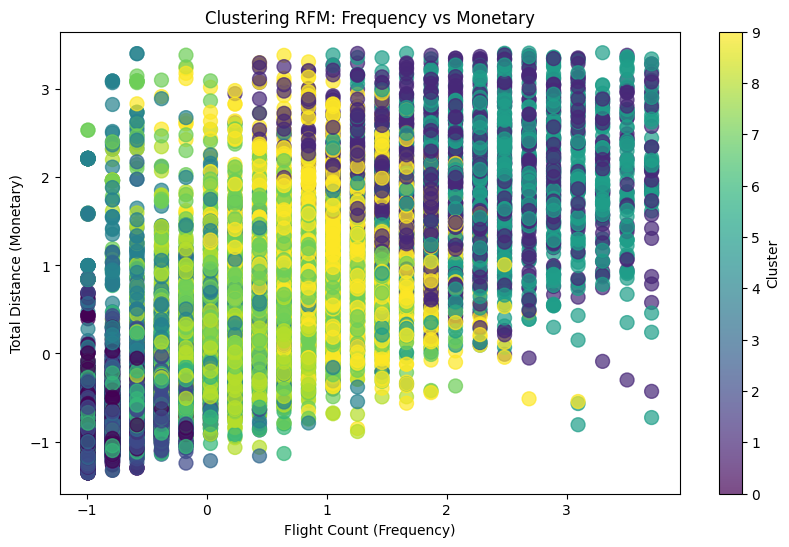

In [114]:
# Scatter plot antar Frequency dan Monetary
plt.figure(figsize=(10, 6))
plt.scatter(X_train_df['Frequency'], X_train_df['Monetary'], c=cluster_labels, cmap='viridis', marker='o', s=100, alpha=0.7)
plt.title("Clustering RFM: Frequency vs Monetary")
plt.xlabel("Flight Count (Frequency)")
plt.ylabel("Total Distance (Monetary)")
plt.colorbar(label='Cluster')
plt.show()

# Interpretasi Grafik Di Atas

## 1. Sumbu dan Makna

### **Sumbu X (Flight Count - Frequency)**
- Mewakili seberapa sering pelanggan melakukan perjalanan.
- Nilai yang lebih tinggi menunjukkan pelanggan yang lebih aktif.

### **Sumbu Y (Total Distance - Monetary)**
- Mewakili total jarak penerbangan sebagai representasi dari nilai pelanggan (Monetary).
- Semakin tinggi nilainya, semakin besar kontribusi pelanggan dalam hal jarak tempuh.

### **Warna (Cluster)**
- Setiap warna menunjukkan kelompok pelanggan yang dihasilkan oleh algoritma clustering.
- Cluster dapat menunjukkan pola perilaku pelanggan yang berbeda berdasarkan seberapa sering mereka terbang dan total jarak yang mereka tempuh.

---

## 2. Pola yang Terlihat
- Terdapat **beberapa kelompok warna berbeda**, yang menunjukkan bahwa metode clustering berhasil mengidentifikasi pelanggan dengan karakteristik berbeda.
- Pelanggan dengan **frekuensi tinggi** (kanan grafik) memiliki distribusi monetary yang lebih beragam, menunjukkan bahwa mereka tidak selalu memiliki total jarak yang tinggi.
- Pelanggan dengan **frekuensi rendah** (kiri grafik) cenderung memiliki distribusi monetary yang lebih rendah, tetapi ada beberapa yang memiliki total jarak tinggi, kemungkinan karena perjalanan jarak jauh dengan frekuensi rendah.

---

## 3. Wawasan dari Visualisasi

### **Cluster dengan Frequency tinggi dan Monetary tinggi**
Pelanggan **paling berharga**, sering terbang dengan total jarak tempuh yang besar.

### **Cluster dengan Frequency rendah tetapi Monetary tinggi**
Pelanggan yang jarang terbang tetapi memiliki total jarak yang tinggi—mungkin pelanggan yang hanya melakukan perjalanan jauh sesekali.

### **Cluster dengan Frequency tinggi tetapi Monetary rendah**
Pelanggan yang sering terbang tetapi dengan total jarak yang lebih pendek—mungkin pelancong domestik reguler.

---

**Kesimpulan:**  
Grafik ini menunjukkan bahwa clustering berbasis RFM berhasil mengidentifikasi **segmen pelanggan dengan pola perjalanan berbeda**. Dengan informasi ini, maskapai atau perusahaan dapat menyesuaikan strategi bisnis dan layanan mereka untuk meningkatkan loyalitas pelanggan dan keuntungan. 


In [115]:
# Visualisasi menggunakan PCA untuk menurunkan ke 2D
from sklearn.decomposition import PCA

In [116]:
# Konversi data menjadi 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

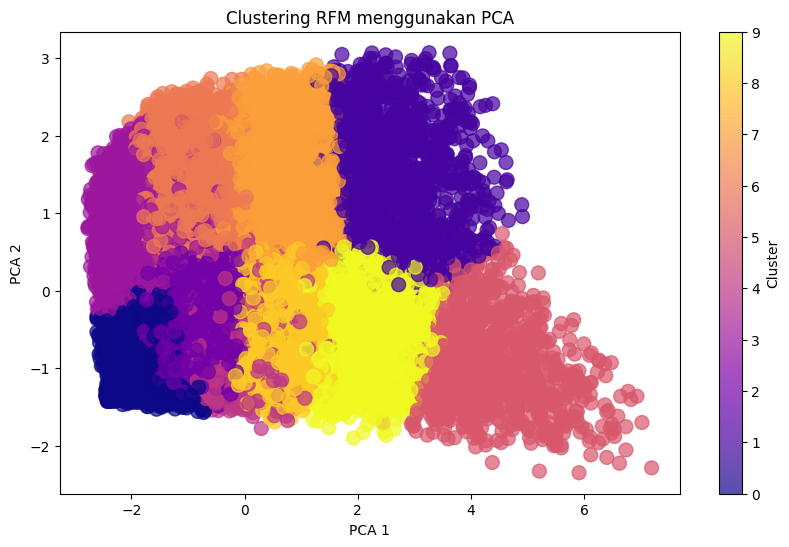

In [117]:
# Scatter plot hasil PCA
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='plasma', marker='o', s=100, alpha=0.7)
plt.title("Clustering RFM menggunakan PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.show()

# Hasil Analisis PCA:

# Interpretasi Grafik PCA pada Clustering RFM

## **Apa yang Ditampilkan Grafik Ini?**
Grafik ini adalah representasi dari clustering pada data RFM yang telah direduksi dimensinya menggunakan **Principal Component Analysis (PCA)**. 

- **Sumbu X (PCA 1):** Komponen utama pertama yang menangkap varians terbesar dalam data.
- **Sumbu Y (PCA 2):** Komponen utama kedua yang menangkap varians terbesar kedua dalam data.
- **Warna:** Menunjukkan cluster yang dihasilkan oleh algoritma clustering.

---

## **Pola yang Terlihat**
🔹 Terdapat **beberapa kelompok warna yang jelas**, menunjukkan bahwa **PCA berhasil mempertahankan struktur cluster** meskipun terjadi reduksi dimensi.  
🔹 Cluster terbentuk dengan **pemisahan yang cukup baik**, artinya data memiliki karakteristik yang berbeda antar kelompok.  
🔹 **Beberapa daerah memiliki distribusi warna yang lebih beragam**, menunjukkan bahwa mungkin terdapat **beberapa area tumpang tindih antar cluster**, tetapi secara keseluruhan tetap terbentuk kelompok yang berbeda.

---

## **Analisis Cluster Berdasarkan Posisi**
### **Cluster di sisi kanan atas (warna kuning & merah)**  
- Kelompok pelanggan dengan **nilai tinggi dalam salah satu atau lebih dari atribut RFM**.
- Kemungkinan **frekuensi tinggi dan monetary tinggi**, atau pelanggan yang sangat aktif.

### **Cluster di sisi kiri bawah (warna biru & ungu)**  
- Kelompok pelanggan dengan **nilai rendah dalam atribut RFM**.
- Kemungkinan pelanggan yang jarang melakukan perjalanan atau memiliki monetary rendah.

### **Cluster di bagian tengah (warna oranye & ungu tua)**  
- Pelanggan dengan **karakteristik menengah**, tidak terlalu aktif tetapi juga bukan pelanggan dengan frekuensi/monetary paling rendah.

---

## **Kesimpulan dan Insight**
✔ **PCA berhasil mereduksi dimensi dari data RFM tanpa kehilangan pola clustering utama.**  
✔ **Terdapat kelompok pelanggan yang berbeda dengan karakteristik yang dapat dianalisis lebih lanjut untuk segmentasi pelanggan.**  
✔ **Dapat digunakan untuk strategi bisnis, seperti program loyalitas atau kampanye pemasaran berbasis segmentasi.**  

# 3D Analisis PCA

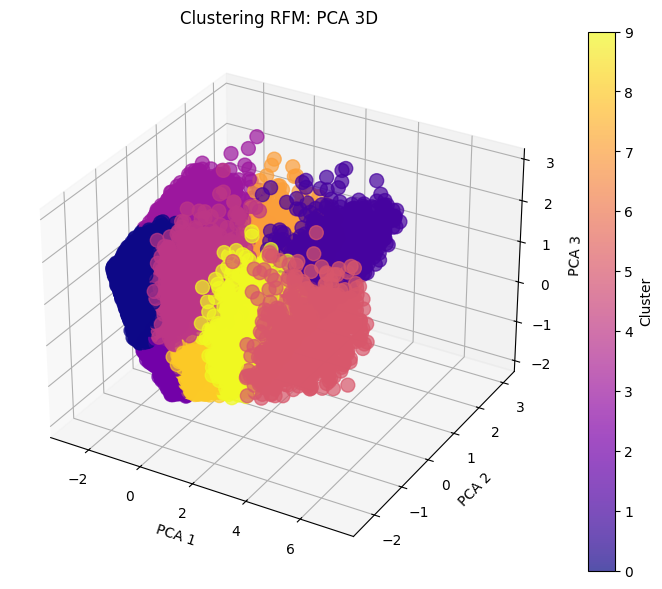

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Reduksi data ke 3D menggunakan PCA
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_train)

# Visualisasi 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=cluster_labels, cmap='plasma', s=100, alpha=0.7)

# Tambahkan label dan legenda
ax.set_title("Clustering RFM: PCA 3D")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.colorbar(scatter, label='Cluster')
plt.show()

# Interpretasi Grafik PCA 3D pada Clustering RFM

## **Apa yang Ditampilkan Grafik Ini?**
Grafik ini merupakan representasi **3 dimensi** dari hasil clustering pada data **RFM** setelah dilakukan reduksi dimensi menggunakan **Principal Component Analysis (PCA)**.  
PCA membantu mengurangi dimensi data tanpa kehilangan terlalu banyak informasi.

- **Sumbu X (PCA 1):** Komponen utama pertama yang menangkap varians terbesar dalam data.
- **Sumbu Y (PCA 2):** Komponen utama kedua yang menangkap varians terbesar kedua dalam data.
- **Sumbu Z (PCA 3):** Komponen utama ketiga yang masih memiliki kontribusi besar dalam menjelaskan variasi data.
- **Warna:** Mewakili **cluster pelanggan** berdasarkan algoritma clustering.

---

## **Pola yang Terlihat**
🔹 **Cluster terlihat cukup terpisah,** yang menunjukkan bahwa metode clustering berhasil mengelompokkan pelanggan dengan pola yang berbeda.  
🔹 Beberapa area memiliki **perpaduan warna**, menunjukkan adanya beberapa titik yang berada di perbatasan antara dua atau lebih cluster.  
🔹 **Cluster berukuran berbeda** dapat menunjukkan adanya kelompok pelanggan dengan jumlah yang lebih besar atau lebih kecil.

---

## **Analisis Berdasarkan Posisi Cluster**
### **Cluster dengan PCA 1 tinggi (kanan)**
- Kemungkinan pelanggan yang memiliki **Frequency dan Monetary tinggi**.
- Bisa menjadi pelanggan yang sering terbang dengan total jarak tempuh yang besar.

### **Cluster dengan PCA 1 rendah (kiri)**
- Kemungkinan pelanggan dengan **Recency tinggi** (jarang terbang) dan Frequency rendah.
- Bisa termasuk pelanggan yang hampir tidak aktif atau sudah berhenti berlangganan.

### **Cluster di tengah**
- Pelanggan dengan karakteristik **menengah**, tidak terlalu aktif tetapi juga bukan pelanggan dengan nilai RFM terendah.
- Bisa menjadi target untuk program loyalitas agar tetap aktif.

---

## **Kesimpulan dan Insight**
✔ **Reduksi dimensi menggunakan PCA masih mampu menjaga struktur clustering utama** meskipun dari data multi-dimensi menjadi hanya **tiga dimensi**.  
✔ **Distribusi pelanggan cukup beragam**, yang berarti setiap cluster memiliki karakteristik yang berbeda dan bisa ditargetkan dengan strategi berbeda.  
✔ **Analisis lebih lanjut bisa dilakukan dengan melihat distribusi asli dari Recency, Frequency, dan Monetary** untuk memahami lebih dalam karakteristik tiap kelompok pelanggan.

# Metrik Evaluasi pada Hasil Klustering

In [ ]:
# Menggunakan hasil clustering 
kmeans = KMeans(n_clusters=10, random_state=42)
cluster_labels = kmeans.fit_predict(X_train_df)

# Hitung silhouette score
silhouette_avg = silhouette_score(X_train_df, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")


Silhouette Score: 0.267


In [120]:
from sklearn.metrics import davies_bouldin_score

# Menghitung Davies-Bouldin Index
dbi_score = davies_bouldin_score(X_train_df, cluster_labels) 
#X_train_df merupakan dataframe hasil standardisasi, sebelum dilakukan analisis model unsupervised
#cluster_label merupakan hasil model unsupervised
print(f"Davies-Bouldin Index: {dbi_score:.3f}")

Davies-Bouldin Index: 1.116


In [121]:
from sklearn.metrics import calinski_harabasz_score

# Menghitung Calinski-Harabasz Index
ch_score = calinski_harabasz_score(X_train_df, cluster_labels)
print(f"Calinski-Harabasz Index: {ch_score:.3f}")


Calinski-Harabasz Index: 11421.259


## RFM Label

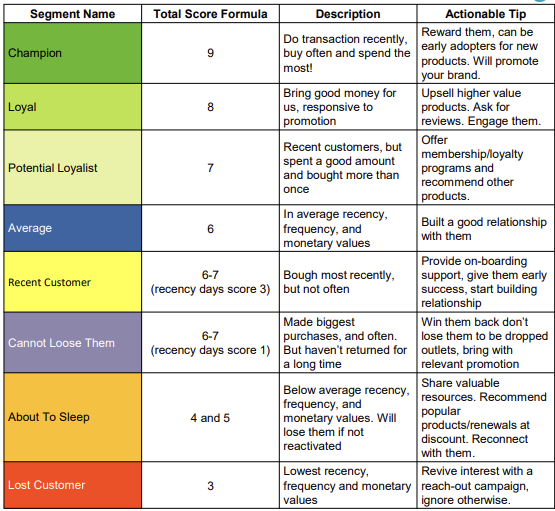

In [122]:
cluster_labels

array([9, 8, 0, ..., 5, 9, 3], dtype=int32)

In [123]:
df

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,Recency,Frequency,Monetary,Length,Coefficient,Cluster
8307,50197,2012-06-23,2012-06-23,Male,4,xiningshi,qinghaisheng,CN,52.0,2014-03-31,19,413,9656.0,11160.0,29113,2014-02-20,41,33.722222,109,0,0.856454,413,0,466,19,29113,1071,0.017740,2
8520,24807,2012-08-23,2013-06-28,Male,4,LEIDEN,guangdong,NL,33.0,2014-03-31,4,17315,0.0,12900.0,32508,2013-08-28,217,20.333333,32,0,0.755000,17315,0,642,4,32508,1010,0.003960,9
8521,7690,2010-01-15,2010-01-15,Male,4,INUYAMA,AICHI,JP,62.0,2014-03-31,21,17927,28500.0,20900.0,32130,2013-10-25,159,28.100000,96,0,0.763810,17927,0,584,21,32130,1961,0.010709,5
8567,24662,2012-06-20,2012-06-20,Male,4,shanghai,shanghai,CN,35.0,2014-03-31,21,18663,1280.0,3298.0,31721,2014-01-25,67,29.200000,86,0,0.770549,18663,0,492,21,31721,1074,0.019553,2
8591,50463,2012-07-14,2012-07-22,Male,4,KAHOKU-SHI,ISHIKAWA-KEN,JP,45.0,2014-03-31,15,17490,6650.0,29666.0,30662,2014-03-31,1,44.142857,198,0,0.795330,17490,0,427,15,30662,1050,0.014286,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62963,10999,2004-12-16,2004-12-18,Female,4,nanhaishi,guangdongsheng,CN,60.0,2014-03-31,2,400,0.0,1000.0,368,2013-07-24,252,4.000000,4,0,0.750000,400,0,677,2,368,3817,0.000524,8
62964,34341,2013-01-31,2013-01-31,Male,4,SURABAYA,JAWATIMUR,ID,40.0,2014-03-31,2,400,830.0,0.0,368,2013-02-10,416,10.000000,10,0,0.750000,400,0,841,2,368,849,0.002356,6
62965,57428,2008-12-05,2008-12-05,Female,4,guangzhou,guangdong,CN,34.0,2014-03-31,2,400,830.0,0.0,368,2013-02-08,418,24.000000,24,0,0.750000,400,0,843,2,368,2367,0.000845,0
62966,60676,2012-07-12,2013-02-08,Male,4,RIYADH,guangdong,AA,37.0,2014-03-31,2,400,830.0,0.0,368,2013-02-14,412,6.000000,6,0,0.750000,400,0,837,2,368,1052,0.001901,6


In [124]:
# Hitung rata-rata RFM per cluster
rfm_summary = df.groupby("Cluster")[["Recency", "Frequency", "Monetary"]].mean()

# Tampilkan hasil
print(rfm_summary)

            Recency  Frequency      Monetary
Cluster                                     
0        913.949405   3.372396   4893.969866
1        519.058583   7.193037   9758.537335
2        494.693033  18.412192  22037.000000
3        596.709023   3.572695   4722.874901
4        535.402967   9.433251  13767.812732
5        499.114708  16.659852  22468.199319
6        948.793485   2.694325   3906.420815
7        524.918782  11.838198  16381.224937
8        550.340431   4.040165   5477.794822
9        809.839518   6.458720  11472.244898


# Analisis Clustering RFM

## Interpretasi Hasil Clustering

| **Cluster** | **Recency (R) ↓** | **Frequency (F) ↑** | **Monetary (M) ↑** | **Interpretasi** |
|------------|-----------------|-----------------|-----------------|-----------------|
| **0**  | 913.95  | 3.37   | 4893.97  | Pelanggan tidak aktif (R tinggi, F rendah, M sedang) |
| **1**  | 519.06  | 7.19   | 9758.54  | Cukup aktif, berkontribusi besar (F & M tinggi) |
| **2**  | 494.69  | 18.41  | 22037.00 | **Sangat aktif, pelanggan paling loyal** |
| **3**  | 596.71  | 3.57   | 4722.87  | Pelanggan lama, transaksi kecil |
| **4**  | 535.40  | 9.43   | 13767.81 | **Pelanggan aktif, bernilai tinggi** |
| **5**  | 499.11  | 16.66  | 22468.20 | **Mirip dengan Cluster 2, sangat loyal** |
| **6**  | 948.79  | 2.69   | 3906.42  | Pelanggan pasif, kontribusi kecil |
| **7**  | 524.91  | 11.83  | 16381.22 | **Cukup loyal, masih sering bertransaksi** |
| **8**  | 550.34  | 4.04   | 5477.79  | Kurang aktif, kontribusi sedang |
| **9**  | 809.84  | 6.46   | 11472.24 | Sedang, tapi tidak se-loyal Cluster 2 atau 5 |

In [125]:
# Fungsi untuk memberi label berdasarkan kriteria tabel segmen pelanggan
def assign_label(row):
    if row["Frequency"] > 15 and row["Monetary"] > 20000:
        return "Champion"
    elif row["Frequency"] > 10 and row["Monetary"] > 15000:
        return "Loyal"
    elif row["Frequency"] > 7 and row["Monetary"] > 9000:
        return "Potential Loyalist"
    elif row["Frequency"] > 5 and row["Monetary"] > 7000:
        return "Average"
    elif row["Recency"] < 550 and row["Frequency"] < 7:
        return "Recent Customer"
    elif row["Recency"] > 600 and row["Monetary"] > 10000:
        return "Cannot Lose Them"
    elif row["Frequency"] < 5 and row["Monetary"] < 6000:
        return "About To Sleep"
    else:
        return "Lost Customer"
    
# Tambahkan kolom label berdasarkan aturan di atas
df["Label Cluster"] = df.apply(assign_label, axis=1)

In [126]:
df[["Cluster", "Recency", "Frequency", "Monetary", "Label Cluster"]]

,Cluster,Recency,Frequency,Monetary,Label Cluster
8307,2,466,19,29113,Champion
8520,9,642,4,32508,Cannot Lose Them
8521,5,584,21,32130,Champion
8567,2,492,21,31721,Champion
8591,2,427,15,30662,Loyal
...,...,...,...,...,...
62963,8,677,2,368,About To Sleep
62964,6,841,2,368,About To Sleep
62965,0,843,2,368,About To Sleep
62966,6,837,2,368,About To Sleep


In [127]:
# Hitung jumlah pelanggan di setiap kategori label
label_counts = df["Label Cluster"].value_counts()
label_counts

Label Cluster
About To Sleep        8800
Potential Loyalist    5469
Lost Customer         4570
Recent Customer       4294
Average               4111
Loyal                 3191
Champion              1466
Cannot Lose Them       725
Name: count, dtype: int64

In [130]:
# Hitung jumlah pelanggan di setiap Label Cluster
hasil = df["Label Cluster"].value_counts().reset_index()
hasil.columns = ["Label Cluster", "Jumlah Pelanggan"]
hasil

,Label Cluster,Jumlah Pelanggan
0,About To Sleep,8800
1,Potential Loyalist,5469
2,Lost Customer,4570
3,Recent Customer,4294
4,Average,4111
5,Loyal,3191
6,Champion,1466
7,Cannot Lose Them,725


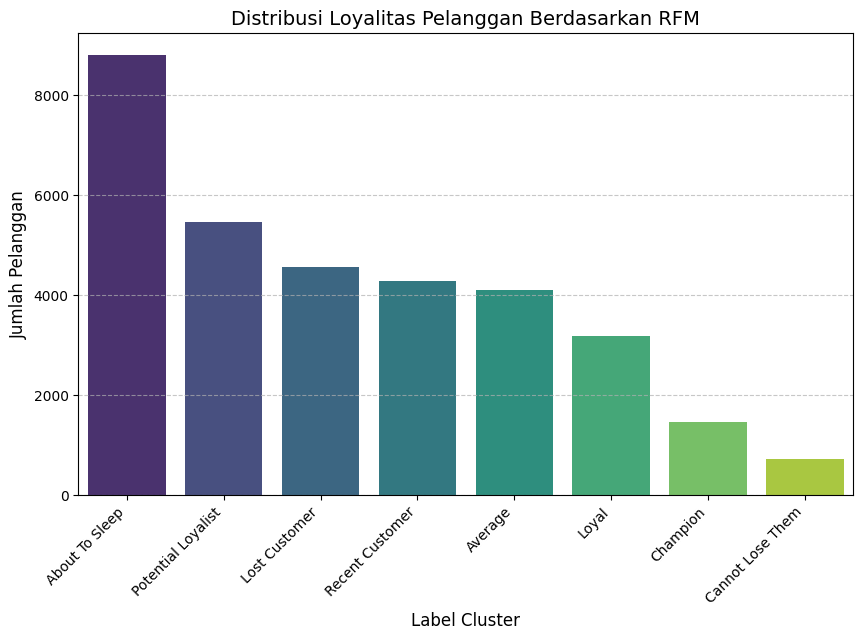

In [131]:
# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="Label Cluster", y="Jumlah Pelanggan", data=hasil, palette="viridis")

# Tambahkan label dan judul
plt.xlabel("Label Cluster", fontsize=12)
plt.ylabel("Jumlah Pelanggan", fontsize=12)
plt.title("Distribusi Loyalitas Pelanggan Berdasarkan RFM", fontsize=14)

# Rotasi label sumbu X agar tidak tumpang tindih
plt.xticks(rotation=45, ha="right")  # 45 derajat dengan perataan ke kanan

plt.grid(axis="y", linestyle="--", alpha=0.7)  # Tambahkan garis bantu

# Tampilkan plot
plt.show()

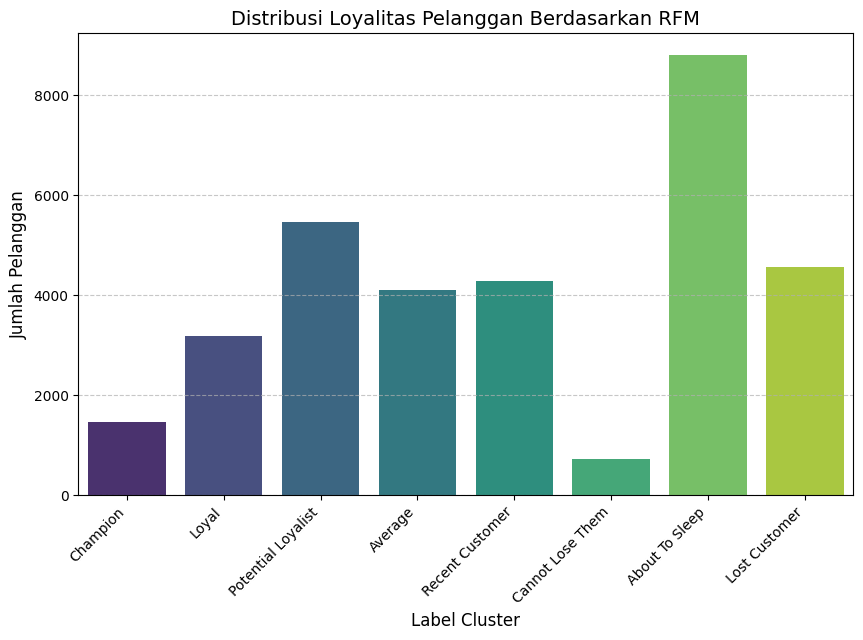

In [ ]:
# Urutan yang benar untuk plot (dari Champion ke Lost Customer)
order = [
    "Champion", "Loyal", "Potential Loyalist", "Average", 
    "Recent Customer", "Cannot Lose Them", "About To Sleep", "Lost Customer"
]
hasil = hasil.set_index("Label Cluster").loc[order].reset_index()

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="Label Cluster", y="Jumlah Pelanggan", data=hasil, palette="viridis")

# Tambahkan label dan judul
plt.xlabel("Label Cluster", fontsize=12)
plt.ylabel("Jumlah Pelanggan", fontsize=12)
plt.title("Distribusi Loyalitas Pelanggan Berdasarkan RFM", fontsize=14)

# Rotasi label sumbu X agar tidak tumpang tindih
plt.xticks(rotation=45, ha="right")  # 45 derajat dengan perataan ke kanan

plt.grid(axis="y", linestyle="--", alpha=0.7)  # Tambahkan garis bantu

# Tampilkan plot
plt.show()

## **Kesimpulan**
- **Cluster 2 dan 5 adalah pelanggan paling loyal**   
  - Mereka memiliki **Frequency dan Monetary tinggi**, serta **Recency rendah**.  
  - Pelanggan ini layak mendapatkan program **loyalty rewards** dan **VIP treatment**.
  
- **Cluster 0, 3, dan 6 adalah pelanggan tidak loyal**   
  - Mereka jarang bertransaksi dan kontribusinya kecil.  
  - Strategi yang bisa diterapkan: **promosi agresif, diskon, atau email marketing**.

- **Cluster 7 dan 4 cukup loyal, masih sering bertransaksi** 

Dengan insight ini, kita bisa membuat strategi retensi pelanggan yang lebih efektif, seperti:
1. Memberi reward ke pelanggan Sangat Loyal untuk meningkatkan retensi.
2. Mengirimkan promo ke pelanggan Kurang Loyal agar lebih sering bertransaksi.
3. Mengidentifikasi pelanggan tidak loyal untuk strategi win-back campaign.